# Alert Today – Alive Tomorrow: Predicting Road Safety.
*Applied Data Science Capstone is part of IBM Data Science Professional Certificate program.*


> *I was not predicting the future, I was trying to prevent it.*  
― **Ray Bradbury**

<img src='https://images.amcnetworks.com/blogs.amctv.com/wp-content/uploads/2010/08/death-proof-crash-555.jpg' /> 

## Table of contents
1. [The project](#project)
2. [Data Understanding](#understanding)
3. [Data Preparation](#preparation)
4. [Model Development and Testing](#model)
5. [Results - Cross Validation](#results)
6. [Discussion](#discussion)
7. [Conclusion](#conclusion)

## 1. The project <a name="project"></a>

### 1.1. Scenario
*Tomorrow evening I have to go visit my brother's family. He lives in another neighborhood, on the other side of town. Shall I drive there or take the metro? Driving is certainly more convenient; will I run into an accident if I take the car? Shall I move the visit to another day?*

<img src='https://d3ewd3ysu1dfsj.cloudfront.net/images/stories/large/46183.jpg?1533657562' /> 

This is a typical everyday situation. To drive or not to drive? Take the car or find another way? If only someone could know.   Answering this question is the scope of this project: provide people with a predictive tool, able to warn them about the likelihood of car accidents and their severity, allowing them to make an informed decision regarding their future travel plans, and choice of transportation.

### 1.2. Scope of the Project

In this project we will try to **predict the risk level of getting into a car accident, and the severity of a potential collision** in the city of Seattle, based on historical data collected by the *Seattle Police Department (SPD)*, and the *Seattle Department of Transportation (SDOT)*, from 2004.

**Target market** of the project will be:
* Anyone with a driving license, and a mean of transport **(the drivers)**, interested in knowing the probability of getting into a car accident and how severe it would be, given factors such as weather, time of the year, location, light conditions..., so that they would drive more carefully or even change their travel plans, if possible;
* **Public authorities** such as police, departments of transportation, road authorities, healthcare providers... in order to be better prepared in dealing with such events knowing the probability and the scale of the problem.

Risk class and severity of accidents will be assessed using the available historical data in terms of severity classes, and other available information such as collision locations, date and time of the event, weather, road and light conditions... 

In order to deliver a product able to satisfy all relevant stakeholders' needs, we'll use an analytic, machine-learning driven approach to build **2 predictive classification models**, as follows:
* **Model 1 - Classification of Risk.** How likely it is getting into a car accident. The model will return a binary-class prediction:
  1. Low risk: input feature data match conditions whose “number of collisions” (or frequency distribution) is less than the average number of collisions;
  2. High risk: input feature data match conditions whose “number of collisions” (or frequency distribution) is greater or equal to the average number of collisions.
   
   
* **Model 2 - Classifification of Collision Severity.** How severe the potential collision is. The model will return a binary-class prediction:
  1. Not severe (property damaged only);
  2. Severe (injuries and fatalities).

## 2. Data Understanding <a name="understanding"></a>

### 2.1. Data Requirements

In order to build a predictive model able to forecast the risk and severity of vehicles' collisions, we need **historical data, as more comprehensive as possible, on road accidents in the region/city of interest**, in our case Seattle.

For better predictive results, the dataset should include attributes such as:
* Time of the year
* Day of the week
* Time of the day
* Incident's location 
* Weather condition
* Light condition
* Road condition
* The collision severity classification

It is important to keep in mind that **the selected analytic approach**, in this project, **is predictive**, and not explanatory or descriptive.
>In predictive modeling [...] criteria for choosing predictors are quality of the association between the predictors and the response, data quality, and **availability of the predictors at the time of prediction**, known as ex-ante availability. In terms of ex-ante availability, whereas chronological precedence of X to Y is necessary in causal models, **in predictive models** not only must X precede Y , but **X must be available at the time of prediction.**  
― **Prof. Galit Shmueli**, Institute of Service Science, College of Technology Management, National Tsing Hua University.  
Reference: <a href=https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf>*To Explain or to Predict?*</a>

Information such as the type of collision, the number of people involved, the kind of reported damage... can be very insightful, and have great causal meaning when it comes to explain the severity of an accident, but **can't really be used to build a predictive model because these pieces of information are available only once an incident has already actually occurred** (ex: how can someone know the kind of accident, or the number of people involved, when trying to predict in advance the likelihood and the severity of the accident itself?).

Therefore, in the attribute selection process, **we're going to select only the attributes that can be actually used as input for our predictive model.**

### 2.2. Data Source

For the scope of this project I am going to use a dataset containing information about all types of collisions that have happened in the city of Seattle, collected by **Seattle Police Department (SPD) and recorded by Traffic Records**.

The dataset has been built with data on all types of collisions **from January 1st, 2004, to May 20th, 2020**.

Let's have a look at the database.

In [1]:
import pandas as pd
data_collisions = pd.read_csv(r'C:\Users\HP\Desktop\COURSERA\IBM Data Science Professional Certificate\9_Applied Data Science Capstone\Data-Collisions.csv')
data_collisions.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 2.3. Preliminary data analysis
Let's check the size of the database.

In [2]:
print('Our dataset contains {} records of collisions, with {} attributes (label column not included).'\
      .format(data_collisions.shape[0], data_collisions.shape[1]-1))

Our dataset contains 194673 records of collisions, with 37 attributes (label column not included).


#### 2.3.1. Data types.

In [3]:
data_collisions.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

The database contains a mix of data types, including integers, floats, and text type.

#### 2.3.2. Labels: Collision classes.

As per the **Attribute Information** table, provided by the Data Source, SEVERITYDESC attribute gives us "*a detailed description of the severity of the collision*". So, let's use this attribute to better understand the collision classes.

In [4]:
# Let's check the Severity-Code-Classification labels
data_collisions.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    136485
2             Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

The severity code classification, in the dataset, is binary.  

##### Classification table:

|SEVERITY CODE|DESCRIPTION          |
|:-----------|:----------------------------|
|1            |Property Damage Only Collision|
|2            |Injury Collision              |

In [5]:
# Let's verify whether we're dealing with a balanced dataset
print('Collisions classifified as Severity-Code 1 (Property Damage Only Collision) are {}% of the whole dataset.'.format(round(data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().loc[1]*100/data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().sum(),2)))
print('Collisions classifified as Severity-Code 2 (Injury Collision) are {}% of the whole dataset.'.format(round(data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().loc[2]*100/data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().sum(),2)))

Collisions classifified as Severity-Code 1 (Property Damage Only Collision) are 70.11% of the whole dataset.
Collisions classifified as Severity-Code 2 (Injury Collision) are 29.89% of the whole dataset.


The dataset is quite imbalanced, with **70% of entries belonging to 1 class** (out of two). It is not an extreme ratio of class imbalance, but we shall keep this in mind during the model training stage. 

#### 2.3.3. Descriptive Statistics - Numeric data types

In [6]:
# Let's have a look at some basic stats regarding the data
data_collisions.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


From the above statistics and numbers, wen can draw some first basic considerations:
* **X and Y**, which represent the coordinates (longitude and latitude, respectively) of the collisions, **have the same number of few null values**.
* **OBJECTID,	INCKEY,	COLDETKEY are all unique identifiers** for the incidents (source = Attribute Information table provided by Data Source)
* **SEVERITYCODE.1 is just column copy** of SEVERITYCODE
* **SDOT_COLCODE:** "A code given to the collision by SDOT (Seattle Department of Transportation)". We have 70 codes (0 - 69) provided by SDOT, referencing descriptions of collisions in SDOT_COLDESC attribute. This attribute can't really be used as predictor, since the information which provides is not available at the time of attempting a prediction (a description/code can be given to a collision only after a collision has occured). **Attribute not available at the time of prediction.**

Let's look for duplicate entries, at first checking every row considering all attributes, than checking whether the unique keys/identifiers have only unique values.

In [7]:
print('Duplicate rows, considering all attributes:', sum(data_collisions.duplicated()))

Duplicate rows, considering all attributes: 0


In [8]:
print('OBJECTID duplicate entries:', data_collisions.shape[0] - data_collisions['OBJECTID'].nunique())
print('INCKEY duplicate entries:', data_collisions.shape[0] - data_collisions['INCKEY'].nunique())
print('COLDETKEY duplicate entries:', data_collisions.shape[0] - data_collisions['COLDETKEY'].nunique())

OBJECTID duplicate entries: 0
INCKEY duplicate entries: 0
COLDETKEY duplicate entries: 0


As per the provided unique keys/identifiers, the dataset doesn't have any duplicate entry.

**Let's start to write a list of attributes we can drop**, since they don't contain any relevant information to the scope of the project:
1. SEVERITYDESC (we've already analyzed the definition of the class codes, so the attribute is redundat now)
2. OBJECTID
3. INCKEY
4. COLDETKEY
5. SEVERITYCODE.1
6. SDOT_COLCODE

Now, let's evaluate the impact of entries with null values in the X and Y attributes, in terms of size as well as class distribtion.

In [9]:
print('Entries without the X geo-coordinate:',len(data_collisions[data_collisions['X'].isnull()]['X'].index))
print('Entries without the Y geo-coordinate:',len(data_collisions[data_collisions['Y'].isnull()]['Y'].index))

Entries without the X geo-coordinate: 5334
Entries without the Y geo-coordinate: 5334


In [10]:
print('Share of entries without any geo-coordinates:{}%'.format\
      (round(len(data_collisions[(data_collisions['X'].isnull()) | (data_collisions['Y'].isnull())][['X','Y']].index)/len\
      (data_collisions.index)*100,2)))

Share of entries without any geo-coordinates:2.74%


In [11]:
# Let's evalutate the class distribution of the entries with no X or Y coordinates.
no_coord = data_collisions[(data_collisions['X'].isnull()) | (data_collisions['Y'].isnull())]
print('Severity-Code 1 collisions with no coordinates (%):',round(no_coord.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().loc[1]*100/no_coord.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().sum(),2))
print('Severity-Code 2 collisions with no coordinates (%):',round(no_coord.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().loc[2]*100/no_coord.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().sum(),2))

Severity-Code 1 collisions with no coordinates (%): 79.94
Severity-Code 2 collisions with no coordinates (%): 20.06


As per the scope of the project, incident's location is an important feature for our predictive model. Luckily, the size of "no-coordinate" entries is quite small: 2.74% of the whole dataset.  
Furthermore, the class distribution of those entries, for some reasons, doesn't follow the general dataset class distribution, but it is actually biased towards the abudant class.  
**We're going to drop those entries.**

**Let's write a list of data entries we are going to drop:**
1. data with no X or Y coordinate

In [12]:
# Let's have another look at the basic descriptive statistics
data_collisions.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


Let's examine the below attributes:
* PERSONCOUNT: The total number of people involved in the collision. 
* PEDCOUNT: The number of pedestrians involved in the collision.
* PEDCYLCOUNT: The number of bicycles involved in the collision.
* VEHCOUNT: The number of vehicles involved in the collision.

These attributes provide meaningful information, for statistical analysis, but these pieces of information can be collected only after a collision's taken place (for instance: how can you know how many people/vehicles are involved in a collision, if the accident has not happened yet?); therefore, **these attributes are not available at the time of prediction.**    
However, the attributes skew towards higher values (compared to the mean or the median of the series) in the last quartile (75% - Max Value). Let's perform some further analysis on each of them to check for anomalies, before dropping the attributes.

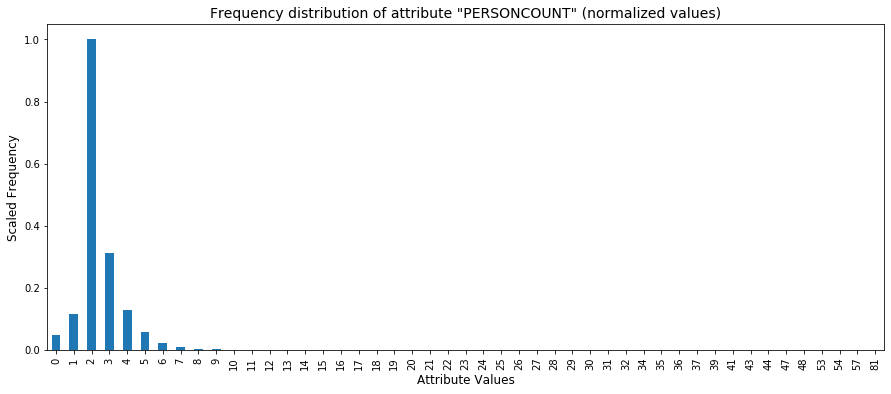

In [13]:
# Let's define a function to represent the frequency distribution of an attribute.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_frequency(dataset, attribute):
    #extract the relevant data, and perform simple feature scaling normalization for better visualization 
    db = pd.DataFrame(dataset[attribute])
    db['index'] = data_collisions.index
    freq = pd.DataFrame(db.groupby([attribute])['index'].count())
    freq.rename(columns={'index':'Frequency'}, inplace=True)
    freq['Frequency'] = freq['Frequency']/freq['Frequency'].max()
    #create the plot    
    freq.plot(kind = 'bar', figsize=(15,6), legend=None)
    plt.title('Frequency distribution of attribute "{}" (normalized values)'.format(attribute), fontsize=14)
    plt.ylabel('Scaled Frequency', fontsize=12)
    plt.xlabel('Attribute Values', fontsize=12)
    plt.show()
    
plot_frequency(data_collisions, 'PERSONCOUNT')

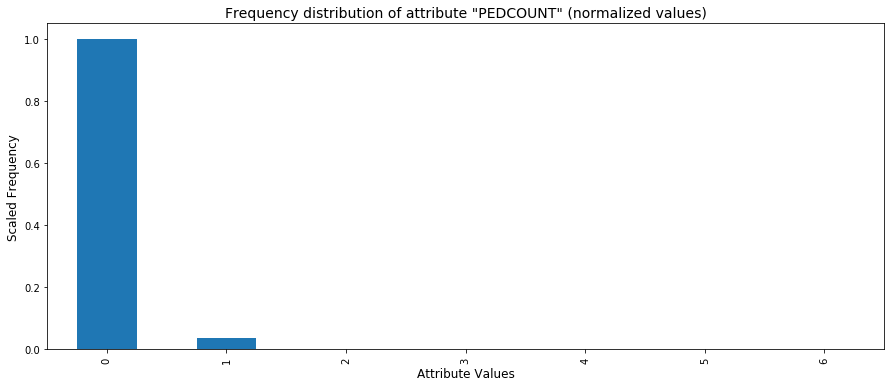

In [14]:
plot_frequency(data_collisions, 'PEDCOUNT')

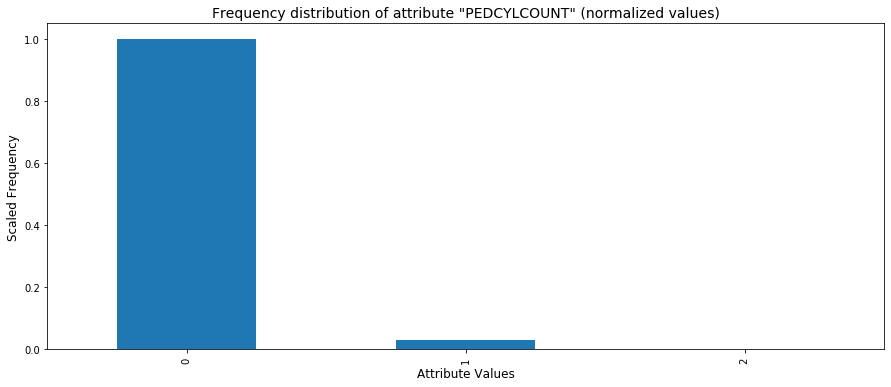

In [15]:
plot_frequency(data_collisions, 'PEDCYLCOUNT')

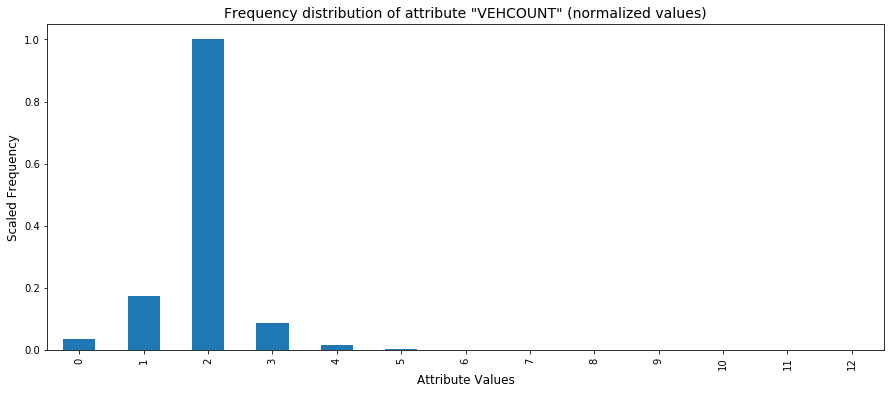

In [16]:
plot_frequency(data_collisions, 'VEHCOUNT')

As expected all these attributes have much higher frequency on lower values. However, these outliers, although unusual (statistically speaking), are a normal part of the data distribution due to its natural variation.

There are 2 weird kinds of data though. Incidents with 0 people involved and incidents with 0 vehicles involved. It seems odd that a car/vehicle collision doesn't involve at least 1 person (how about the driver?) and 1 vehicle. So, let's examine these cases before deciding whether to keep them or not.

In [17]:
coll_people_0 = data_collisions[data_collisions['PERSONCOUNT'] == 0]
print('The number of incidents recorded as involving 0 people is {}, which accounts for {}% of the whole dataset.'\
      .format(coll_people_0.shape[0], round(coll_people_0.shape[0]/data_collisions.shape[0]*100,2)))

The number of incidents recorded as involving 0 people is 5544, which accounts for 2.85% of the whole dataset.


In [18]:
print('Class distribution:')
print(coll_people_0['SEVERITYCODE'].value_counts())
print('')
print('The "0-poeple-involved" collisions record {} incidents labelled as "Severity-Code 2 - Injury Collision."'\
.format(coll_people_0['SEVERITYCODE'].value_counts().loc[2]))

Class distribution:
1    3782
2    1762
Name: SEVERITYCODE, dtype: int64

The "0-poeple-involved" collisions record 1762 incidents labelled as "Severity-Code 2 - Injury Collision."


In [19]:
# Let's have a look at collision types and description
print('Collision type and description samples, provided by the State and SDOT, of incidents which involved 0 people:')
print('')
print(coll_people_0['COLLISIONTYPE'].value_counts().head())
print('')
print(coll_people_0['SDOT_COLDESC'].value_counts().head())
print('')
print(coll_people_0['ST_COLDESC'].value_counts().head(8))

Collision type and description samples, provided by the State and SDOT, of incidents which involved 0 people:

Angles        1217
Parked Car    1114
Rear Ended    1038
Sideswipe      610
Other          581
Name: COLLISIONTYPE, dtype: int64

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE    2582
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END              1723
NOT ENOUGH INFORMATION / NOT APPLICABLE                    242
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT              184
MOTOR VEHICLE STRUCK OBJECT IN ROAD                        172
Name: SDOT_COLDESC, dtype: int64

Entering at angle                                                      1217
One parked--one moving                                                 1002
From same direction - both going straight - one stopped - rear-end      754
From same direction - both going straight - both moving - sideswipe     414
Fixed object                                                            381
From opposite direction - one 

It does seem that these collisions (0-people-involved) actually did involve pedestrians as well as pedalcyclists, both vehicles moving, people being injured... **they must have involved someone!**  
It is likely an error in the "PERSONCOUNT" attribute, so we may just drop the attribute as planned and keep these entries. Although, considering the size of the dataset, and the fact they account for only 2.87% of it, **I feel more comfortable with discarding them, to avoid building a model with erroneous, wrongly recorded entries.**

In [20]:
# Now, let's examine the incidents with 0 vehicles involved.
vehicles_0 = data_collisions[data_collisions['VEHCOUNT'] == 0]
print('The number of incidents recorded as involving 0 vehicles is {}, which accounts for {}% of the whole dataset.'\
      .format(vehicles_0.shape[0], round(vehicles_0.shape[0]/data_collisions.shape[0]*100,2)))

The number of incidents recorded as involving 0 vehicles is 5085, which accounts for 2.61% of the whole dataset.


In [21]:
print('Class distribution:')
print(vehicles_0['SEVERITYCODE'].value_counts())

Class distribution:
1    3858
2    1227
Name: SEVERITYCODE, dtype: int64


In [22]:
# Let's have a look at collision types and description
print('Collision type and description samples, provided by the State and SDOT, of incidents which involved 0 vehicles:')
print('')
print(vehicles_0['COLLISIONTYPE'].value_counts())
print('')
print(vehicles_0['SDOT_COLDESC'].value_counts().head(7))
print('')
print(vehicles_0['ST_COLDESC'].value_counts())

Collision type and description samples, provided by the State and SDOT, of incidents which involved 0 vehicles:

Cycles        199
Other           1
Pedestrian      1
Name: COLLISIONTYPE, dtype: int64

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE     1911
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END               1544
NOT ENOUGH INFORMATION / NOT APPLICABLE                     815
MOTOR VEHCILE STRUCK PEDESTRIAN                             136
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE     127
MOTOR VEHICLE STRUCK OBJECT IN ROAD                          88
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE        84
Name: SDOT_COLDESC, dtype: int64

Vehicle - Pedalcyclist                                                                  178
Pedalcyclist Strikes Pedalcyclist or Pedestrian                                          18
Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR      3
Vehicle overturned                      

We have quite few entries in the **COLLISIONTYPE** and **ST_COLDESC** attributes.  
**SDOT_COLDESC** attribute gives us a better idea of what happened in these incidents, and it's clear (as well as it should be obvious) that they did involve at least 1 vehicle.  
Again, it is likely an error in the attribute (so we may just drop the **VEHCOUNT** attribute and keep the entries), but taking into account the lack of data in the COLLISIONTYPE and ST_COLDESC attributes, and the fact these entries account for only 2.61% of the dataset, **I prefer to discard them**, in order to avoid building a model with erroneous, wrongly recorded data.

#### Let's update the list of data entries we are going to drop:
1. data with no X or Y coordinate
2. data with value 0 in the PERSONCOUNT attribute
3. data with value 0 in the VEHCOUNT attribute

Let's continue our analysis.

In [23]:
# Let's have a look at the descriptive stats again
data_collisions.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [24]:
# Let's define a function to get some basic info (total, unique, missing values, and value range) on a particular attribute.
# Then let's have a look at the attributes INTKEY, SEGLANEKEY, CROSSWALKKEY.

def attribute_snippet(dataset, attribute):
    print('{} attribute total values:'.format(dataset[attribute].name))
    print(len(dataset[attribute]))
    print('{} attribute unique values:'.format(dataset[attribute].name))
    print(dataset[attribute].nunique(dropna=True))
    print('{} attribute missing values:'.format(dataset[attribute].name))
    print(sum(dataset[attribute].isnull()))
    print('{} attribute value range:'.format(dataset[attribute].name))
    print(int(dataset[attribute].min()), '-', int(data_collisions[attribute].max()))
    print('')
    
attribute_snippet(data_collisions, 'INTKEY')
attribute_snippet(data_collisions, 'SEGLANEKEY')
attribute_snippet(data_collisions, 'CROSSWALKKEY')

INTKEY attribute total values:
194673
INTKEY attribute unique values:
7614
INTKEY attribute missing values:
129603
INTKEY attribute value range:
23807 - 757580

SEGLANEKEY attribute total values:
194673
SEGLANEKEY attribute unique values:
1955
SEGLANEKEY attribute missing values:
0
SEGLANEKEY attribute value range:
0 - 525241

CROSSWALKKEY attribute total values:
194673
CROSSWALKKEY attribute unique values:
2198
CROSSWALKKEY attribute missing values:
0
CROSSWALKKEY attribute value range:
0 - 5239700



* **INTKEY, SEGLANEKEY, CROSSWALKKEY** are all keys for location features such as intersections, segment lanes, and crosswalks, where the collisions took place (source = Attribute Information table provided by Data Source). Information on locations is part of our data requirements, but, if we look at the numbers above, it seems these attributes are not really useful for the scope for this project, without mentioning other considerations such as atrributes' availability for end users, and attribute's redundancy (we already have the geo-coordinates of the collision). **Attributes not relevant/redundat.**
* **SDOTCOLNUM**: "A number given to the collision by SDOT". No further infomation is provided. **We'll have a look at the attribute, before dropping it.**

In [25]:
# Let's have a look at the attribute SDOTCOLNUM    
attribute_snippet(data_collisions, 'SDOTCOLNUM')

SDOTCOLNUM attribute total values:
194673
SDOTCOLNUM attribute unique values:
114932
SDOTCOLNUM attribute missing values:
79737
SDOTCOLNUM attribute value range:
1007024 - 13072024



It's pretty clear that **SDOTCOLNUM attribute doesn't have any kind of relevance to our scope**. We'll drop it. 

#### Let's update the list of attributes we are going to drop:
1. SEVERITYDESC
2. OBJECTID
3. INCKEY
4. COLDETKEY
5. SEVERITYCODE.1
6. PERSONCOUNT
7. PEDCOUNT
8. PEDCYLCOUNT
9. VEHCOUNT
10. SDOT_COLCODE
11. SDOTCOLNUM
12. INTKEY
13. SEGLANEKEY
14. CROSSWALKKEY 

#### 2.3.4. Descriptive Statistics - Object types

In [26]:
#Now let's have a look at basic stats regarding object datatype
pd.options.display.max_columns = 22
data_collisions.describe(include = ['object'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,188344,194673,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,7,39,1,4,11,9,9,1,1,115,62,2
top,1776526,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,89800,85209,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


Let's draw some considerations, based on the above descriptive statistics:
* **REPORTNO**: no information is provided by the data source. It looks like an unique key for reporting purposes, with very few duplicates. **We are going to have a look at the duplicates before dropping the attribute.**
* **STATUS**: no information is provided by the data source. However, it's a binary item, whose mode covers 97% of all data entries. **Not a relevant attribute to the scope of the project.**
* **INATTENTIONIND**: "Whether or not collision was due to inattention (Y/N)", which is true for 15% of incidents (29,805) in our current dataset. However, **the attribute is not relevant to the scope of the project.**
* **PEDROWNOTGRNT**: "Whether or not the pedestrian right of way was not granted (Y/N)", which is true for 2% (4,667 incidents) of the total cases. **Attribute not available at the time of attempting a prediction.**
* **SPEEDING**: "Whether or not speeding was a factor in the collision. (Y/N)", which is true for almost 5% (9,333 incidents) of total records. However, **Attribute not available at the time of attempting a prediction.**
* **ST_COLCODE**: "A code provided by the state that describes the collision." As well as the collision codes/descriptions provided by SDOT, **the attribute won't be available at the time of attempting a prediction.**
* **ST_COLDESC**: "A description that corresponds to the state’s coding designation (ST_COLCODE)". **Attribute not available at the time of attempting a prediction.**
* **HITPARKEDCAR**: "Whether or not the collision involved hitting a parked car (Y/N)", which is not true for 96% of recored collisions. Anyway, **the attribute doesn't seem relevant to our scope.**  

Let's continue our analysis.

* **ADDRTYPE**

In [27]:
# Let's define a function to return attribute's unique values and frequency (in percetage).
# Then let's define a function to return attribute's unique values, frequency (aboslute values) and severity-class distribition.
# Then let's have a look at ADDRTYPE attribute

#attribute's unique values and frequency (in percentage):
def unival_and_freq(dataset, attribute):
    print('{} attribute - Unique Values and Frequency (% values):'.format(dataset[attribute].name))
    print(dataset[attribute].value_counts(normalize=True))
    print('')

#attribute's unique values, frequency and severity-class distribition:
def unival_freq_classdistr(dataset, attribute, classes):
    print('{} attribute - Unique Values and Frequency:'.format(dataset[attribute].name))
    print(dataset[attribute].value_counts())
    print('')
    print('{} attribute - Collision-Severity class distribution'.format(dataset[attribute].name))
    print(dataset.groupby([attribute])[classes].value_counts(normalize=True))
    print('')

unival_freq_classdistr(data_collisions, 'ADDRTYPE', 'SEVERITYCODE')

ADDRTYPE attribute - Unique Values and Frequency:
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

ADDRTYPE attribute - Collision-Severity class distribution
ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64



**ADDRTYPE**: "Collision address type". The attribute has 3 unique values ("Block", "Intersection", "Alley"), which are definitely relevant for the severity collison classification. But this information is **actually redundant** considering we already have the exact address (latitude and longitude) of the collision. Furthemore, **this address classification may not be a very user-friendly feature**, if we consider the point of view of our target market who needs to input this kind of information in order to have a prediction reagrding a potential collision. **We'll drop the attribute.**

* **LOCATION**

In [28]:
# Let's have a look at the LOCATION attribute
data_collisions['LOCATION'].head(10)

0                     5TH AVE NE AND NE 103RD ST
1     AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
2    4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST
3       2ND AVE BETWEEN MARION ST AND MADISON ST
4                SWIFT AVE S AND SWIFT AV OFF RP
5                     24TH AVE NW AND NW 85TH ST
6                     DENNY WAY AND WESTLAKE AVE
7                         BROADWAY AND E PIKE ST
8            PINE ST BETWEEN 5TH AVE AND 6TH AVE
9                  41ST AVE SW AND SW THISTLE ST
Name: LOCATION, dtype: object

The **LOCATION** attribute gives the description (or the address) of the collision, which is exactly the same information the Y and X attribute (latitude and longitude) gives us. **The attribute is redundant.**

* **EXCEPTRSNCODE, EXCEPTRSNDESC**

In [29]:
# Let's have a look at the EXCEPTRSNCODE and EXCEPTRSNDESC attributes
unival_and_freq(data_collisions, 'EXCEPTRSNCODE')
unival_and_freq(data_collisions, 'EXCEPTRSNDESC')

EXCEPTRSNCODE attribute - Unique Values and Frequency (% values):
       0.933523
NEI    0.066477
Name: EXCEPTRSNCODE, dtype: float64

EXCEPTRSNDESC attribute - Unique Values and Frequency (% values):
Not Enough Information, or Insufficient Location Information    1.0
Name: EXCEPTRSNDESC, dtype: float64



In [30]:
print('A snippet of the dataset:')
data_collisions[data_collisions['EXCEPTRSNCODE'] == "NEI"][['X','Y','EXCEPTRSNCODE','EXCEPTRSNDESC']].head(5)

A snippet of the dataset:


,X,Y,EXCEPTRSNCODE,EXCEPTRSNDESC
74,NaN,NaN,NEI,"Not Enough Information, or Insufficient Locati..."
103,-122.340986,47.664662,NEI,"Not Enough Information, or Insufficient Locati..."
106,-122.377451,47.562455,NEI,"Not Enough Information, or Insufficient Locati..."
116,-122.331859,47.617610,NEI,"Not Enough Information, or Insufficient Locati..."
171,NaN,NaN,NEI,"Not Enough Information, or Insufficient Locati..."


**EXCEPTRSNCODE**: no information is provided by the data source. It is a binary item, covering 43% of total entries, and with 93% of items belonging to one (seemingly empty) category. The minority class is defined as "NEI", referencing to "Not Enough Information, or Insufficient Locati..." value in the EXCEPTRSNDESC attribute. It'd look like as though the incidents belonging to the "NEI" class won't have enough information on their location, but we do have the X and Y coordinate for some of them. **Not a relevant attribute.**  
**EXCEPTRSNDESC**: no information is provided by the data source. See the remarks for the above attribute. **Not a relevant attribute.**

* **COLLISIONTYPE**

In [31]:
unival_freq_classdistr(data_collisions, 'COLLISIONTYPE', 'SEVERITYCODE')

COLLISIONTYPE attribute - Unique Values and Frequency:
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

COLLISIONTYPE attribute - Collision-Severity class distribution
COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2  

**COLLISIONTYPE**: "Collision type". The attribute is defintely statistically interesting, but a type of collision can be known only after a collision happened, so the attribute is **not available at the time of prediction.**

* **JUNCTIONTYPE**

In [32]:
# Let's have a look at the JUNCTIONTYPE attribute
unival_freq_classdistr(data_collisions, 'JUNCTIONTYPE', 'SEVERITYCODE')

JUNCTIONTYPE attribute - Unique Values and Frequency:
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

JUNCTIONTYPE attribute - Collision-Severity class distribution
JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.703051
                                                   2               0.296949
At Intersection (intersection related)             1               0.567362
                                                   2               0.432638
Driveway Junction                                  1               0

**JUNCTIONTYPE:** "category of junction at which collision took place". The attribute has 7 unique values, which are definitely relevant for the severity collison classification. But, as well as for ADDRTYPE, this information is actually redundant considering we already have the exact address (latitude and longitude) of the collision. Furthemore, this junction classification may not be very user-friendly, if we consider the point of view of our target market who needs to input this kind of information in order to have a prediction reagrding a potential collision. **We'll drop the attribute.**

* **SDOT_COLDESC**

In [33]:
unival_and_freq(data_collisions, 'SDOT_COLDESC')

SDOT_COLDESC attribute - Unique Values and Frequency (% values):
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          0.437703
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    0.278924
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE         0.050998
NOT ENOUGH INFORMATION / NOT APPLICABLE                         0.050274
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                   0.045492
MOTOR VEHCILE STRUCK PEDESTRIAN                                 0.033482
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE          0.030061
MOTOR VEHICLE STRUCK OBJECT IN ROAD                             0.024354
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE           0.015945
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE        0.008239
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE         0.007397
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE            0.006740
MOTOR VEHICLE OVERTURNED IN ROAD                           

**SDOT_COLDESC**: "A description of the collision corresponding to the collision code (SDOT_COLCODE)". **Attribute not available at the time of attempting a prediction.**

* **UNDERINFL**

"Whether or not a driver involved was under the influence of drugs or alcohol". This should be a Y/N categorical attribute, but we have 4 unique values, instead of 2. Although **the attribute wouldn't be available at the time of attempting a prediction**, let's check for anomalies before dropping it.

In [34]:
unival_and_freq(data_collisions, 'UNDERINFL')

UNDERINFL attribute - Unique Values and Frequency (% values):
N    0.528345
0    0.423597
Y    0.027009
1    0.021050
Name: UNDERINFL, dtype: float64



It seems there is a mistake in the attribute classification: '0' and '1' have been used alongside the correct N and Y, with the same meaning (N=0, Y=1). However statistically relevant the attribute is, the attribute can't be used to attempt a prediction, because of its unavailability at the time of the prediction itself.  
**We can drop the attribute.**

* Let's look at **REPORTNO duplicates**

In [35]:
#Let's find the duplicates
data_collisions[data_collisions.duplicated(subset = 'REPORTNO', keep=False)]['REPORTNO'].sort_values()

3647     1776526
11799    1776526
170      1780512
2829     1780512
410      1782439
7231     1782439
Name: REPORTNO, dtype: object

We had already checked for duplicated records, and we actually didn't find any, but now we have 3 entries with the same REPORTNO key. It might be that these entries had been wrongly recorded using 2 different unique keys for other identifier/key-attributes (like OBJECTID, for instance).  
**We'll have a look at these duplicates before dropping them.**

**Let's update the list of data entries we are going to drop:**
* data with no X or Y coordinate
* data with value 0 in the PERSONCOUNT attribute
* data with value 0 in the VEHCOUNT attribute
* data with same REPORTNO

**Let's update the list of attributes we are going to drop:**
1. SEVERITYDESC
2. OBJECTID
3. INCKEY
4. COLDETKEY
5. SEVERITYCODE.1
6. PERSONCOUNT
7. PEDCOUNT
8. PEDCYLCOUNT
9. VEHCOUNT
10. SDOT_COLCODE
11. SDOTCOLNUM
12. REPORTNO *(after checking the entries with same REPORTNO value)*
13. STATUS
14. EXCEPTRSNCODE
15. EXCEPTRSNDESC
16. COLLISIONTYPE
17. SDOT_COLDESC
18. INATTENTIONIND
19. UNDERINFL
20. PEDROWNOTGRNT
21. SPEEDING
22. ST_COLCODE
23. ST_COLCODESC
24. HITPARKEDCAR
25. ADDRTYPE
26. INTKEY
27. LOCATION
28. JUNCTIONTYPE
29. SEGLANEKEY
30. CROSSWALKKEY

### 2.4. Data Cleaning

In [36]:
# let's verify whether X and Y null values are already defined by the Python's default missing value marker.
data_collisions[(data_collisions['X'].isnull()) | (data_collisions['Y'].isnull())][['X','Y']]

,X,Y
10,NaN,NaN
17,NaN,NaN
29,NaN,NaN
74,NaN,NaN
120,NaN,NaN
...,...,...
194434,NaN,NaN
194492,NaN,NaN
194539,NaN,NaN
194568,NaN,NaN


In [37]:
# Let's drop entries with no X/Y coordinate, with value 0 in the PERSONCOUNT attribute, and in the VEHCOUNT attribute.
# Then we drop the select attributes (we keep REPORTNO for the moment, for duplicate analysis)
data_collisions.dropna(subset = ['X'], axis = 0, inplace = True)
data_collisions.dropna(subset = ['Y'], axis = 0, inplace = True)
data_collisions.drop(data_collisions[data_collisions['PERSONCOUNT'] == 0].index, axis = 0, inplace = True)
data_collisions.drop(data_collisions[data_collisions['VEHCOUNT'] == 0].index, axis = 0, inplace = True)
data_collisions.reset_index(drop=True, inplace=True)

data_collisions.drop(['SEVERITYDESC', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1', 'PERSONCOUNT', 'PEDCOUNT',\
                      'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'SDOTCOLNUM', 'STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',\
                      'SDOT_COLDESC', 'COLLISIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE'\
                      , 'ST_COLDESC', 'HITPARKEDCAR', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'JUNCTIONTYPE', 'SEGLANEKEY',\
                      'CROSSWALKKEY'], axis = 1, inplace = True)

print('Our dataset now contains {} records of collisions, with {} attributes (label column not included).'\
      .format(data_collisions.shape[0], data_collisions.shape[1]-1))

Our dataset now contains 178968 records of collisions, with 8 attributes (label column not included).


Let's have a look now at the entries with the same report number.

In [38]:
# Let's look for duplicate in the cleaned dataset
print('Duplicate rows, considering all attributes:', sum(data_collisions.duplicated()))

Duplicate rows, considering all attributes: 3


In [39]:
# Let's find the duplicated REPORTNO values
dup_reportno=data_collisions[data_collisions.duplicated(subset = 'REPORTNO', keep=False)]['REPORTNO'].sort_values()
dup_reportno

3346     1776526
11215    1776526
153      1780512
2579     1780512
362      1782439
6793     1782439
Name: REPORTNO, dtype: object

In [40]:
#Let's visualize the duplicate incidents
duplicates = data_collisions[data_collisions.duplicated(keep=False)].sort_values(by = 'REPORTNO', axis=0)
duplicates

,SEVERITYCODE,X,Y,REPORTNO,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
3346,2,-122.329047,47.595387,1776526,2004/04/21 00:00:00+00,4/21/2004 12:45:00 PM,Clear,Wet,Daylight
11215,2,-122.329047,47.595387,1776526,2004/04/21 00:00:00+00,4/21/2004 12:45:00 PM,Clear,Wet,Daylight
153,1,-122.318958,47.695842,1780512,2004/04/25 00:00:00+00,4/25/2004 5:00:00 AM,Unknown,Unknown,Unknown
2579,1,-122.318958,47.695842,1780512,2004/04/25 00:00:00+00,4/25/2004 5:00:00 AM,Unknown,Unknown,Unknown
362,2,-122.355302,47.682178,1782439,2004/04/25 00:00:00+00,4/25/2004 10:58:00 AM,Clear,Dry,Daylight
6793,2,-122.355302,47.682178,1782439,2004/04/25 00:00:00+00,4/25/2004 10:58:00 AM,Clear,Dry,Daylight


In [41]:
#Let's verify whether the duplicate entries have the same dulicate REPORTNO value
duplicates['REPORTNO'] == dup_reportno

3346     True
11215    True
153      True
2579     True
362      True
6793     True
Name: REPORTNO, dtype: bool

We've verified that the entries with the same REPORTNO value are actually duplicates (they have exactly the same values in all other attributes as well).  
**We can now drop the duplicates and the REPORTNO attribute as well.**

In [42]:
data_collisions.drop(data_collisions[data_collisions.duplicated() == True].index, axis = 0, inplace = True)
data_collisions.drop(['REPORTNO'], axis = 1, inplace = True)
data_collisions.reset_index(drop=True, inplace=True)

print('Our dataset now contains {} records of collisions, with {} attributes (label column not included).'\
      .format(data_collisions.shape[0], data_collisions.shape[1]-1))

Our dataset now contains 178965 records of collisions, with 7 attributes (label column not included).


### 2.5. Data Assessment

In [43]:
data_collisions.describe(include='all')

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
count,178965.000000,178965.000000,178965.000000,178965,178965,178783,178847,178696
unique,NaN,NaN,NaN,5926,150905,11,9,9
top,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Clear,Dry,Daylight
freq,NaN,NaN,NaN,88,88,104998,117722,109568
mean,1.302752,-122.330621,47.619644,NaN,NaN,NaN,NaN,NaN
std,0.459450,0.030020,0.056205,NaN,NaN,NaN,NaN,NaN
min,1.000000,-122.419091,47.495573,NaN,NaN,NaN,NaN,NaN
25%,1.000000,-122.348925,47.575989,NaN,NaN,NaN,NaN,NaN
50%,1.000000,-122.330298,47.615544,NaN,NaN,NaN,NaN,NaN
75%,2.000000,-122.311966,47.663957,NaN,NaN,NaN,NaN,NaN


**Our dataset is made of 178,965 records of collisions, with 7 attributes, and the Label Column (SEVERITYCODE).**

We can group the data attributes in 3 clusters:
* **Geo-Information/Location** attributes, which include:
  1. X: The longitude value of the incident location
  2. Y: The latitude value of the incident location
  
  
* **Date and Time** attributes, which include:
  1. INCDATE: The date of the incident
  2. INCDTTM: The date and time of the incident
  
  
* **Environmental** attributes, which include:
  1. WEATHER: A description of the weather conditions during the time of the collision (11 categories)
  2. ROADCOND: The condition of the road during the collision (9 categories) - *This attribute might be redundant, and doesn't seem very "user-friendly", that is it may be difficult for a user knowing in advance the condition of the road. However, we keep it for the time being and we'll assess it on a later stage in our analysis.*
  3. LIGHTCOND: The light conditions during the collision (9 categories)

In [44]:
print('Collisions classifified as Severity-Code 1 (Property Damage Only Collision) are {}% of the whole dataset.'.format(round(data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().loc[1]*100/data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().sum(),2)))
print('Collisions classifified as Severity-Code 2 (Injury Collision) are {}% of the whole dataset.'.format(round(data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().loc[2]*100/data_collisions.groupby(['SEVERITYCODE'])['SEVERITYCODE'].count().sum(),2)))

Collisions classifified as Severity-Code 1 (Property Damage Only Collision) are 69.72% of the whole dataset.
Collisions classifified as Severity-Code 2 (Injury Collision) are 30.28% of the whole dataset.


After the cleaning, the dataset has the same imbalanced class ratio, with 70% of entries belonging to the abundant class (Severity Code: 1).

In [45]:
data_collisions.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
INCDATE          object
INCDTTM          object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

After the cleaning, the dataset still contains numeric (both integers and floats) as well as object data types.

In [46]:
# Finally, let's have a look at the first and last 5 rows of our dataset.
data_collisions.head()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,-122.306426,47.545739,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


In [47]:
data_collisions.tail()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
178960,2,-122.290826,47.565408,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Clear,Dry,Daylight
178961,1,-122.344526,47.690924,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Raining,Wet,Daylight
178962,2,-122.306689,47.683047,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,Clear,Dry,Daylight
178963,2,-122.355317,47.678734,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,Clear,Dry,Dusk
178964,1,-122.289360,47.611017,2018/11/30 00:00:00+00,11/30/2018 3:45:00 PM,Clear,Wet,Daylight


## 3. Data Preparation <a name="preparation"></a>

In [48]:
import folium
from sklearn.preprocessing import StandardScaler
# Import progressbar to measure the progress of a process:
from tqdm import tqdm
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns

### 3.1. Data Mining and Preprocessing

#### Geo-Information/Location Attributes

Let's start our data mining process by superimposing the locations of the incidents (random sample of 500 incidents) onto Seattle map.

In [49]:
collisions_sample_df = pd.DataFrame()
np.random.seed(seed=0)
randintlist = np.random.randint(0, high=178965, size=500)

for i in randintlist:
    collisions_sample_df = collisions_sample_df.append(other=data_collisions.loc[i], ignore_index=True, sort=True)
    
collisions_map = folium.Map(location=[47.60621, -122.33207], zoom_start=12)
coordinates = collisions_sample_df[['Y','X']]
collisions_featuregroup = folium.map.FeatureGroup()

for c in range(len(coordinates)):
    collisions_featuregroup.add_child(folium.features.CircleMarker([coordinates.iloc[c]['Y'], coordinates.iloc[c]['X']],\
                                                                  radius=2, color='red'))

collisions_map.add_child(collisions_featuregroup)

#### Environmental Attributes

Let's check for redundancy between the attributes "WEATHER" and "ROADCOND".

In [50]:
# Let's have a look at the "WEATHER" attribute's unique values and their frequency 
data_collisions['WEATHER'].value_counts()

Clear                       104998
Raining                      31207
Overcast                     26488
Unknown                      13728
Snowing                        885
Other                          757
Fog/Smog/Smoke                 531
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [51]:
# Let's have a look at the "ROADCOND" attribute's unique values and their frequency 
data_collisions['ROADCOND'].value_counts()

Dry               117722
Wet                44986
Unknown            13672
Ice                 1161
Snow/Slush           979
Other                113
Standing Water        99
Sand/Mud/Dirt         63
Oil                   52
Name: ROADCOND, dtype: int64

In [52]:
# Let's check the redundancy between the attributes, for the bigger categories
def redundancy_check(dataset, grouped_attribute, category, checked_attribute):
    group = dataset.groupby([grouped_attribute])
    print('{} attribute, "{}" category - {} distribution (normalized values):'.format\
          (grouped_attribute, category, checked_attribute))
    print(group.get_group(category)[checked_attribute].value_counts(normalize=True))
    print('')
    
redundancy_check(data_collisions, 'WEATHER', 'Clear', 'ROADCOND')
redundancy_check(data_collisions, 'WEATHER', 'Raining', 'ROADCOND')
redundancy_check(data_collisions, 'WEATHER', 'Overcast', 'ROADCOND')

WEATHER attribute, "Clear" category - ROADCOND distribution (normalized values):
Dry               0.955077
Wet               0.032816
Ice               0.005830
Unknown           0.004391
Snow/Slush        0.000876
Other             0.000562
Sand/Mud/Dirt     0.000248
Oil               0.000152
Standing Water    0.000048
Name: ROADCOND, dtype: float64

WEATHER attribute, "Raining" category - ROADCOND distribution (normalized values):
Wet               0.972951
Dry               0.018844
Snow/Slush        0.002916
Standing Water    0.002500
Unknown           0.001058
Oil               0.000801
Ice               0.000449
Sand/Mud/Dirt     0.000320
Other             0.000160
Name: ROADCOND, dtype: float64

WEATHER attribute, "Overcast" category - ROADCOND distribution (normalized values):
Dry               0.582883
Wet               0.389583
Unknown           0.012350
Ice               0.008347
Snow/Slush        0.004834
Other             0.000906
Sand/Mud/Dirt     0.000567
Oil          

It's clear there's a huge redundancy between the "WEATHER" categories "Clear" and "Raining" and the "ROADCOND" categories "Dry" and "Wet".

In [53]:
redundancy_check(data_collisions, 'ROADCOND', 'Dry', 'WEATHER')
redundancy_check(data_collisions, 'ROADCOND', 'Wet', 'WEATHER')

ROADCOND attribute, "Dry" category - WEATHER distribution (normalized values):
Clear                       0.852221
Overcast                    0.131178
Unknown                     0.006774
Raining                     0.004998
Fog/Smog/Smoke              0.002839
Other                       0.001402
Blowing Sand/Dirt           0.000238
Snowing                     0.000195
Severe Crosswind            0.000076
Sleet/Hail/Freezing Rain    0.000042
Partly Cloudy               0.000034
Name: WEATHER, dtype: float64

ROADCOND attribute, "Wet" category - WEATHER distribution (normalized values):
Raining                     0.675185
Overcast                    0.229406
Clear                       0.076617
Unknown                     0.009029
Fog/Smog/Smoke              0.003403
Snowing                     0.003358
Other                       0.001312
Sleet/Hail/Freezing Rain    0.001223
Severe Crosswind            0.000267
Blowing Sand/Dirt           0.000178
Partly Cloudy               0.0000

The "WEATHER" "Overcast" category doesn't really overlap with the "ROADCOND" attribute categories though.  
*Shall we keep both attributes or only one of them? and which one shall we keep?*  
Without going any further with other statistical analysis, if we consider the "availability at the time of prediction" principle, **we should keep only the "WEATHER" attribute**, to avoid redundancy, and because predicting what the Road Conditions might be during an "overcast" day, for example, is simply not feasible.
**We are going to drop the "ROADCOND" attribute.**

In [54]:
data_collisions.drop(['ROADCOND'], axis=1, inplace=True)
data_collisions.head()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,LIGHTCOND
0,2,-122.323148,47.703140,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Daylight
1,1,-122.347294,47.647172,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Dark - Street Lights On
2,1,-122.334540,47.607871,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Daylight
3,1,-122.334803,47.604803,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Daylight
4,2,-122.306426,47.545739,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Daylight


Let's check whether we have any missing values in the remaining Environmental attributes

In [55]:
missing_data = data_collisions[['WEATHER','LIGHTCOND']].isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

WEATHER
False    178783
True        182
Name: WEATHER, dtype: int64

LIGHTCOND
False    178696
True        269
Name: LIGHTCOND, dtype: int64



We have very few missing values for each of the attributes.

In [56]:
print(data_collisions['WEATHER'].value_counts())
print('')
print(data_collisions['LIGHTCOND'].value_counts())

Clear                       104998
Raining                      31207
Overcast                     26488
Unknown                      13728
Snowing                        885
Other                          757
Fog/Smog/Smoke                 531
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Daylight                    109568
Dark - Street Lights On      46171
Unknown                      12282
Dusk                          5613
Dawn                          2341
Dark - No Street Lights       1401
Dark - Street Lights Off      1129
Other                          180
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


I am going to categorize the missing values as "Unkown".  
In the "LIGHTCOND" attribute, I am going to group the "Dark - No Street Lights" and "Dark - Street Lights Off" categories.

In [57]:
data_collisions['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
data_collisions['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)

missing_data = data_collisions[['WEATHER','LIGHTCOND']].isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

WEATHER
False    178965
Name: WEATHER, dtype: int64

LIGHTCOND
False    178965
Name: LIGHTCOND, dtype: int64



In [58]:
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Dark - No Street Lights'].index, 'LIGHTCOND'] = \
'Dark - Street Lights Off'
data_collisions['LIGHTCOND'].value_counts()

Daylight                    109568
Dark - Street Lights On      46171
Unknown                      12551
Dusk                          5613
Dark - Street Lights Off      2530
Dawn                          2341
Other                          180
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [59]:
data_collisions.head()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,LIGHTCOND
0,2,-122.323148,47.703140,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,Overcast,Daylight
1,1,-122.347294,47.647172,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Raining,Dark - Street Lights On
2,1,-122.334540,47.607871,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Overcast,Daylight
3,1,-122.334803,47.604803,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Clear,Daylight
4,2,-122.306426,47.545739,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,Raining,Daylight


#### Date and Time Attributes

In [60]:
#Let's check whether we have any missing values in the Date and Time attributes
missing_data = data_collisions[['INCDATE','INCDTTM']].isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

INCDATE
False    178965
Name: INCDATE, dtype: int64

INCDTTM
False    178965
Name: INCDTTM, dtype: int64



We don't have any missing data in the Date and Time columns.

Let's convert the object date/time attributes to datetime object.

In [61]:
data_collisions['INCDATE'] = pd.to_datetime(data_collisions['INCDATE'])
data_collisions['INCDTTM'] = pd.to_datetime(data_collisions['INCDTTM'])
data_collisions.head()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,LIGHTCOND
0,2,-122.323148,47.703140,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,Overcast,Daylight
1,1,-122.347294,47.647172,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Raining,Dark - Street Lights On
2,1,-122.334540,47.607871,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Overcast,Daylight
3,1,-122.334803,47.604803,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Clear,Daylight
4,2,-122.306426,47.545739,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,Raining,Daylight


In [62]:
data_collisions.dtypes

SEVERITYCODE                  int64
X                           float64
Y                           float64
INCDATE         datetime64[ns, UTC]
INCDTTM              datetime64[ns]
WEATHER                      object
LIGHTCOND                    object
dtype: object

Let's create "month", "day_of_the_week", "hour_of_day", "day_period", and "weekend" columns to perform some further analysis.

For the "day_period" attribute, I group the 24 hours into 4 categories:
* 1: night -> from midnight to 6 am
* 2: morning -> from 6 am to 12 pm
* 3: afternoon -> from 12 pm to 6 pm 
* 4: evening -> from 6 pm to midnight

The "weekend" attribute has 2 values:
* 0 -> No
* 1 -> Yes

In [63]:
data_collisions['month'] = data_collisions['INCDATE'].dt.month
data_collisions['day_of_week'] = data_collisions['INCDATE'].dt.dayofweek
data_collisions['hour_of_day'] = data_collisions['INCDTTM'].dt.hour

data_collisions['day_period'] = data_collisions['hour_of_day'].apply(lambda x:1 if (0<=x<6) else 2 if (6<=x<12)\
                                                                     else 3 if (12<=x<18) else 4)

data_collisions['weekend'] = data_collisions['day_of_week'].apply(lambda x:1 if (x>3) else 0)



data_collisions.head()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,LIGHTCOND,month,day_of_week,hour_of_day,day_period,weekend
0,2,-122.323148,47.703140,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,Overcast,Daylight,3,2,14,3,0
1,1,-122.347294,47.647172,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Raining,Dark - Street Lights On,12,2,18,4,0
2,1,-122.334540,47.607871,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Overcast,Daylight,11,3,10,2,0
3,1,-122.334803,47.604803,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Clear,Daylight,3,4,9,2,1
4,2,-122.306426,47.545739,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,Raining,Daylight,1,2,8,2,0


___

#### 3.1.1. Model 1 - Classification of Risk

#### Geo-Information/Location attributes.

In order to develop a model able to predict the risk of potential road accidents, we have to build a dataset with all the relevant attributes and a risk classification, as follows:
* 1: Low risk (input feature data match conditions whose “number of collisions” (or frequency distribution) is less than the average number of collisions).
* 2: High risk (input feature data match conditions whose “number of collisions” (or frequency distribution) is gteater or equal to the average number of collisions).

To prepare the dataset, let's start to cluster the collision's addresses (latitude and longitude) into clusters.

##### Note:
> Another way to categorize the collision's coordinates would be linking each pair of coordinates (latitude and longitude) in our data set to their actual neighborhood and/or postal codes. This is called **Reverse Geocoding**, which is the process of back (reverse) coding of a point location (latitude, longitude) to a readable address or place name (this permits the identification of nearby street addresses, places, and/or areal subdivisions such as neighbourhoods, county, state, or country). To perform **Reverse Geocoding**, we should use **geocoder library**, with an **API key from Google Cloud Platform** services. The problem with this approach is that there is an API limit of use, and it takes very long time to process all the rows in our dataset, so to save time, for the scope of this project, I'll perform a clustering algorithm instead. However, I write below the code, in case someone were interested, to perform Reverse Geocoding.

```python
# import geocoder for reverse geocoding
import geocoder
# Import progressbar to measure the progress of the whole process
from tqdm import tqdm

# Convert the attributes to tuples to speed up the process
latitude = tuple(data_collisions['Y'])
longitude = tuple(data_collisions['X'])
# Create 2 empty lists to be filled with geo information  
neighborhoods = []
postal_codes = []

with tqdm(position=0, leave=True) as pbar:
    for lat, long in tqdm(zip(latitude, longitude), position=0, leave=True):
        location_info = geocoder.google([lat, long], method='reverse', key=api_key)
    # check if the field "neighborhood" is in the dictionary returned by geocoder; if not, returns a null value
        if 'neighborhood' in location_info.json.keys():
            neighborhoods.append(location_info.json['neighborhood'])
        else:
            neighborhoods.append(0)
    # check if the field "postal" is in the dictionary returned by geocoder; if not, returns a null value
        if 'postal' in location_info.json.keys():
            postal_codes.append(location_info.json['postal'])
        else:
            postal_codes.append(0)

print('List of first 100 collision neighborhoods:', neighborhoods[0:100])
print('List of first 100 collision postal codes:', postal_codes[0:100])
```

In [64]:
# Let's create an array with X and Y coordinates (longitude and latitude)
geo_coord = data_collisions[['X', 'Y']].values
geo_coord

array([[-122.3231484 ,   47.70314032],
       [-122.3472943 ,   47.64717249],
       [-122.33454   ,   47.60787143],
       ...,
       [-122.3066886 ,   47.68304696],
       [-122.3553167 ,   47.67873428],
       [-122.2893597 ,   47.61101705]])

In [65]:
#Let's normalize the data
norm_geo_coord = StandardScaler().fit(geo_coord).transform(geo_coord)
norm_geo_coord

array([[ 0.24892088,  1.48557876],
       [-0.55540219,  0.48979325],
       [-0.13054424, -0.20945534],
       ...,
       [ 0.7972126 ,  1.12807559],
       [-0.82263603,  1.05134393],
       [ 1.37445487, -0.15348814]])

To cluster the longitude and latitude of collision lcations we use a partition based clustering algorithm like **K-Means**. Since with K-Means we have to pre-set the number of clusters (k), we're going to run the algorithm with different number of clusters (from 2 to 50), measure the mean Euclidean distance (datapoints - centroids) for each iteration, that is for each k, and then compare them.

In [ ]:
distances = []
squared_distance = 0
mean_distance = []
num_clusters = []

# Run the clustering algorithm KMeans several times with different number of clusters, from 2 to 50.
with tqdm(position=0, leave=True) as pbar:
    for k in tqdm(range(2,51), position=0, leave=True):
        clusters = KMeans(n_clusters = k, random_state=0).fit(norm_geo_coord)
# Create 2 arrays with centrdoids' coordinates and labels, and data points' coordinates and labels.     
        centroids = np.hstack((clusters.cluster_centers_, np.atleast_2d(np.unique(clusters.labels_)).T))
        norm_geo_coord_withclusters = np.hstack((norm_geo_coord, np.atleast_2d(clusters.labels_).T))
# Calculate the Euclidean distance, in each cluster, between points and centroid.         
        for c in range(len(centroids)):
            data = norm_geo_coord_withclusters[norm_geo_coord_withclusters[:,2] == centroids[c,2]]
            for d in range(len(data)):
                squared_distance += (data[d,0] - centroids[c,0])**2 + (data[d,1] - centroids[c,1])**2            
            distances.append(np.sqrt(squared_distance))
# Reset the "square_distance" variable for next iteration            
            squared_distance = 0    
# Calculate and store the mean distance points-centroids, and the k number of clusters, in 2 separate list  
        mean_distance.append(np.mean(distances))
        num_clusters.append(k)
# Reset the "distances" list for next iteration
        distances = []

Let's create a dataframe with "K" and "mean_distance" as attributes.

In [ ]:
numclusters_vs_meandistance = pd.DataFrame()
numclusters_vs_meandistance['K'] = num_clusters
numclusters_vs_meandistance['mean_distance'] = mean_distance
numclusters_vs_meandistance.set_index('K', inplace = True)

##### Note:
>Since running K-Means several times and recording the mean distance takes very long time, I saved the dataframe *numclusters_vs_meandistance* in my local drive in order not to run the above code everytime I close and open this notebook.

```python
numclusters_vs_meandistance.to_csv(r'my_local_drive_path\numclusters_vs_meandistance.csv')
```

In [66]:
# numclusters_vs_meandistance = pd.read_csv(r'my_local_drive_path\numclusters_vs_meandistance.csv')

In [67]:
# numclusters_vs_meandistance.set_index('K', inplace = True, drop = True)
# numclusters_vs_meandistance.drop(['Unnamed: 0'], axis=1, inplace = True)
# numclusters_vs_meandistance.head()

,mean_distance
K,
2,334.975461
3,225.515066
4,164.575803
5,123.178623
6,101.940695


Let's plot the "number of clutser VS mean distance" data and apply the **elbow rule** to choose the right K (number of clusters).

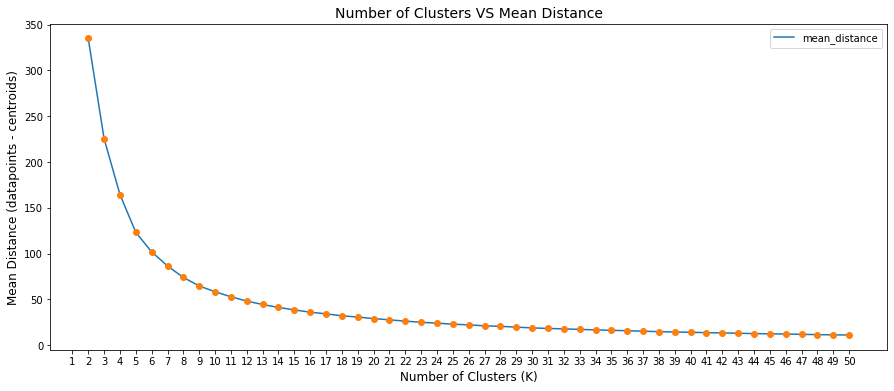

In [68]:
numclusters_vs_meandistance.plot(figsize = (15,6))
plt.plot(numclusters_vs_meandistance.index, numclusters_vs_meandistance['mean_distance'], 'o')
plt.title('Number of Clusters VS Mean Distance', fontsize=14)
plt.ylabel('Mean Distance (datapoints - centroids)', fontsize=12)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.xticks(ticks = range(1,51))

plt.show()

It seems the that the rate of decrease **changes more sharply when K = 5**. Let's "zoom in", for better visualization, and plot the graph again.

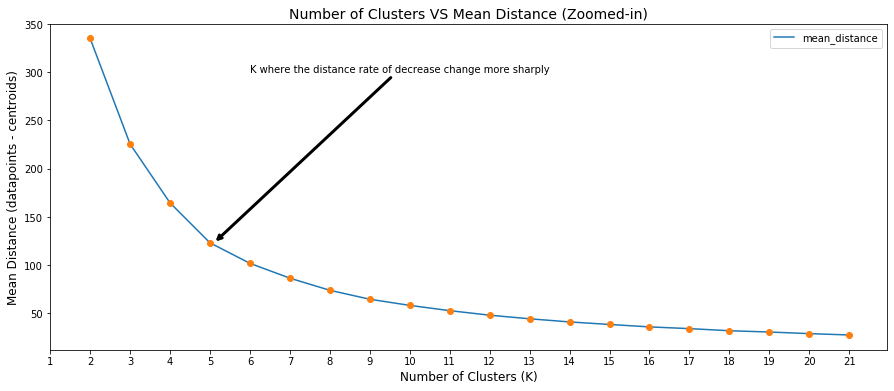

In [69]:
numclusters_vs_meandistance.iloc[0:20].plot(figsize = (15,6))
plt.plot(numclusters_vs_meandistance.iloc[0:20].index, numclusters_vs_meandistance.iloc[0:20]['mean_distance'], 'o')
plt.title('Number of Clusters VS Mean Distance (Zoomed-in)', fontsize=14)
plt.ylabel('Mean Distance (datapoints - centroids)', fontsize=12)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.xticks(ticks = range(1,22))

plt.annotate('K where the distance rate of decrease change more sharply',
            xy=(5.1,123.178623),
            xytext=(6,300),
            arrowprops = dict(arrowstyle='->', lw=3))

plt.show()

So **the right number of clusters is 5**; let's perform K-Means clustering again, setting the K-parameter equals to 5, and assign each collision to its geo-cluster ("neighborhood") in our dataset.

In [70]:
clusters = KMeans(n_clusters = 5).fit(norm_geo_coord)
cl_labels = clusters.labels_
data_collisions['neighborhood'] = cl_labels

# let's have a look at the dataset
data_collisions.head()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,LIGHTCOND,month,day_of_week,hour_of_day,day_period,weekend,neighborhood
0,2,-122.323148,47.703140,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,Overcast,Daylight,3,2,14,3,0,3
1,1,-122.347294,47.647172,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Raining,Dark - Street Lights On,12,2,18,4,0,1
2,1,-122.334540,47.607871,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Overcast,Daylight,11,3,10,2,0,0
3,1,-122.334803,47.604803,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Clear,Daylight,3,4,9,2,1,0
4,2,-122.306426,47.545739,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,Raining,Daylight,1,2,8,2,0,2


In [71]:
data_collisions.tail()

,SEVERITYCODE,X,Y,INCDATE,INCDTTM,WEATHER,LIGHTCOND,month,day_of_week,hour_of_day,day_period,weekend,neighborhood
178960,2,-122.290826,47.565408,2018-11-12 00:00:00+00:00,2018-11-12 08:12:00,Clear,Daylight,11,0,8,2,0,2
178961,1,-122.344526,47.690924,2018-12-18 00:00:00+00:00,2018-12-18 09:14:00,Raining,Daylight,12,1,9,2,0,1
178962,2,-122.306689,47.683047,2019-01-19 00:00:00+00:00,2019-01-19 09:25:00,Clear,Daylight,1,5,9,2,1,3
178963,2,-122.355317,47.678734,2019-01-15 00:00:00+00:00,2019-01-15 16:48:00,Clear,Dusk,1,1,16,3,0,1
178964,1,-122.289360,47.611017,2018-11-30 00:00:00+00:00,2018-11-30 15:45:00,Clear,Daylight,11,4,15,3,1,2


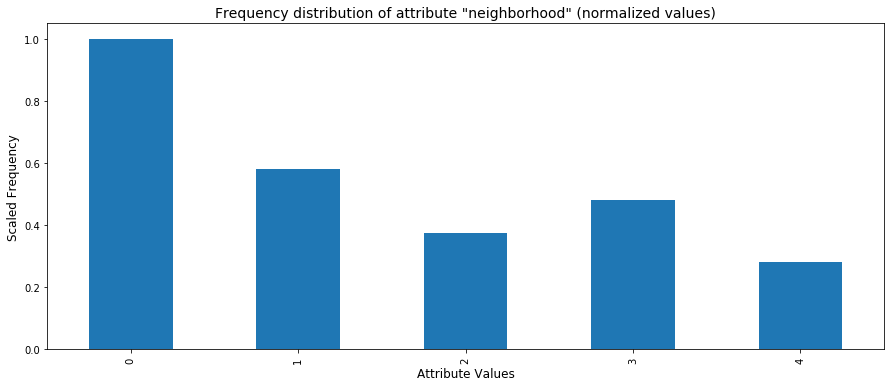

In [72]:
#let's plot the Frequency distribution of the attribute Neighborhood
plot_frequency(data_collisions, 'neighborhood')

Let's create a new dataframe with "neighborhood" and "number_of_collisions" as attributes. 

In [73]:
model1_dataset = data_collisions.groupby(['neighborhood'])['SEVERITYCODE'].count().to_frame()
model1_dataset.reset_index(inplace=True)
model1_dataset.rename(columns = {'SEVERITYCODE':'number_of_collisions'}, inplace=True)
model1_dataset

,neighborhood,number_of_collisions
0,0,65906
1,1,38217
2,2,24651
3,3,31617
4,4,18574


#### Date and Time Features

In [74]:
#Let's check whether we have any missing values in the Date and Time attributes
missing_data = data_collisions[['INCDATE','INCDTTM']].isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

INCDATE
False    178965
Name: INCDATE, dtype: int64

INCDTTM
False    178965
Name: INCDTTM, dtype: int64



We don't have any missing data in the Date and Time columns.

Let's check the frequency distribution of data/time attributes. Let's start with "month".

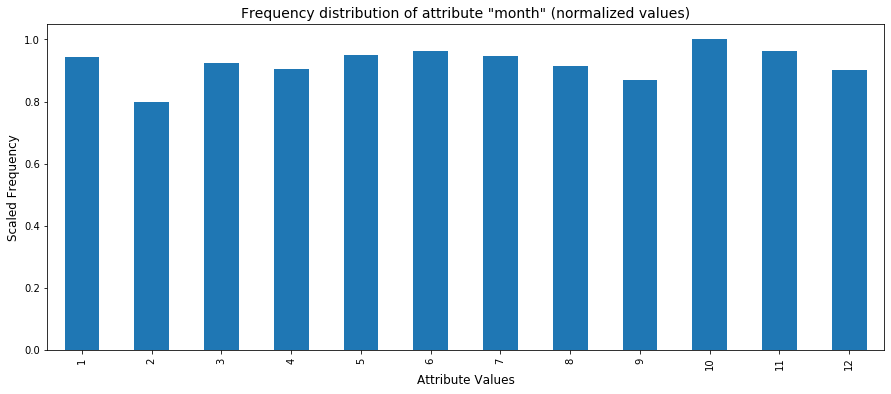

month attribute - Unique Values and Frequency (% values):
10    0.090303
11    0.086989
6     0.086916
5     0.085905
7     0.085369
1     0.085184
3     0.083363
8     0.082457
4     0.081686
12    0.081401
9     0.078384
2     0.072042
Name: month, dtype: float64



In [75]:
plot_frequency(data_collisions, 'month')
unival_and_freq(data_collisions, 'month')

The number of collisons are actually quite equally distributed over the 12 months: Ocotber is the month with the highest number of collisions (9%) and February experiences the lowest number of collisions (7%). It appears that **the attribute "month" doesn't really play a role in predicting the number of collisions.**

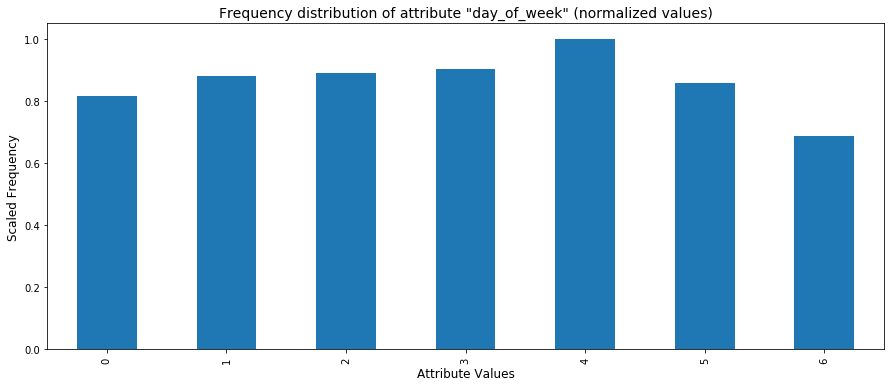

day_of_week attribute - Unique Values and Frequency (% values):
4    0.165848
3    0.149929
2    0.147336
1    0.145844
5    0.142005
0    0.135133
6    0.113905
Name: day_of_week, dtype: float64



In [76]:
# Let's check the frequency of the "day_of_week" attribute
plot_frequency(data_collisions, 'day_of_week')
unival_and_freq(data_collisions, 'day_of_week')

Again, the number of collisions are actually quite equally distributed over the 7 weekdays. Friday is the only day of the week where the number of collisions slightly exceeds the 15% threshold (16.6%); however, the difference with the other days is not very significant. Therefore, **I don't consider the attribute as a good predictor for our *Risk Classification model***.

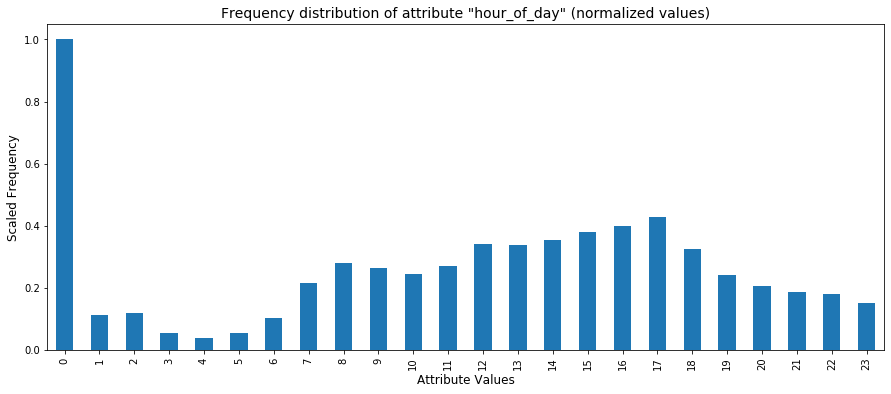

hour_of_day attribute - Unique Values and Frequency (% values):
0     0.158785
17    0.068142
16    0.063633
15    0.060598
14    0.056039
12    0.054256
13    0.053916
18    0.051423
8     0.044595
11    0.042818
9     0.041880
10    0.038834
19    0.038387
7     0.034197
20    0.032755
21    0.029430
22    0.028905
23    0.024094
2     0.019004
1     0.018037
6     0.016601
3     0.008706
5     0.008549
4     0.006415
Name: hour_of_day, dtype: float64



In [77]:
# Let's check the frequency distribution of the "hour_of_day" attribute
plot_frequency(data_collisions, 'hour_of_day')
unival_and_freq(data_collisions, 'hour_of_day')

The collisions distribution over the 24 hours is more interesting for our scope. The midnight hour experiences a way higher number of collisions compared to all other hours of the day.  
Let's check the frequency distribution of "day-period" categories.

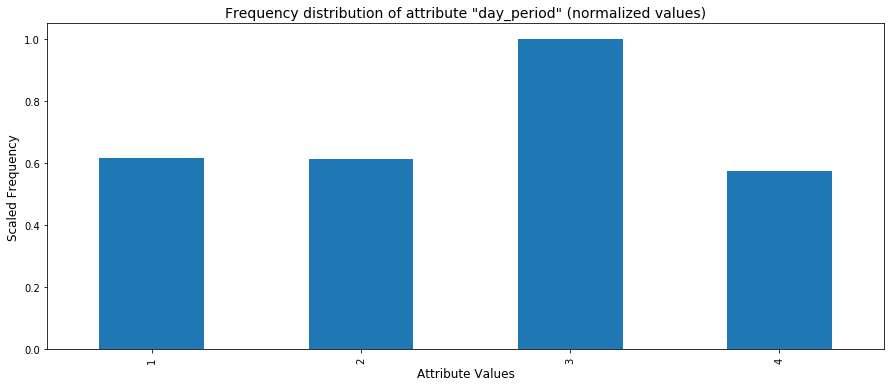

day_period attribute - Unique Values and Frequency (% values):
3    0.356584
1    0.219495
2    0.218925
4    0.204995
Name: day_period, dtype: float64



In [78]:
plot_frequency(data_collisions, 'day_period')
unival_and_freq(data_collisions, 'day_period')

In the "afternoon" (from 12 pm until 7 pm), the number of collisions is cumulatively greater then in the remaining day periods. But this "grouping" doesn't take into account the midnight hour, that is the hour with the greatest number of collisions. Therefore, to create the feature set for our Model-1, I'm not going to group the day hours.

**Let's keep building the dataset for *Model-1: Classification of Risk***, by adding the 'hour_of_day' attribute.

In [79]:
model1_dataset = data_collisions.groupby(['neighborhood', 'hour_of_day'])['SEVERITYCODE'].count().to_frame()
model1_dataset.reset_index(inplace=True)
model1_dataset.rename(columns = {'SEVERITYCODE':'number_of_collisions'}, inplace=True)

model1_dataset.head()

,neighborhood,hour_of_day,number_of_collisions
0,0,0,10391
1,0,1,1364
2,0,2,1517
3,0,3,566
4,0,4,396


#### Environmental Features

Let's check the frequency distribution of the "WEATHER" attribute.

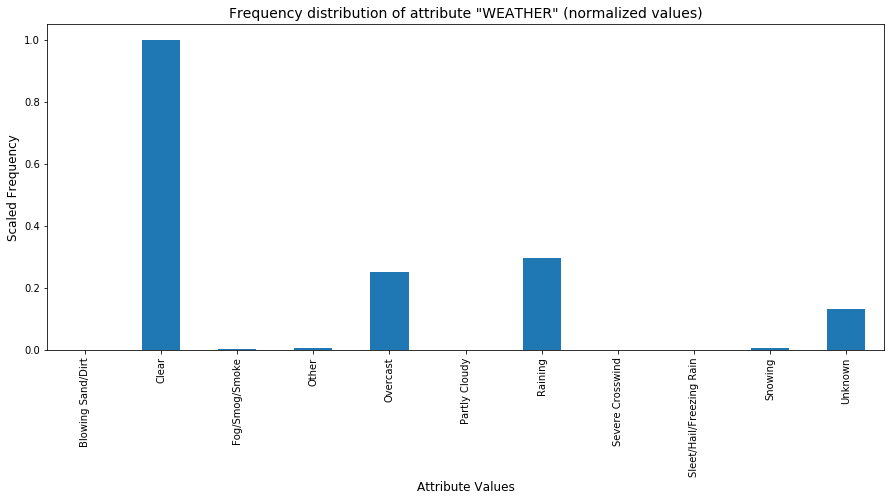

In [80]:
plot_frequency(data_collisions, 'WEATHER')

**The distribution of collisions' number is clearly dependent on the weather conditions.** It does seem we may have **quite some noise** though, with 6 categories (out of 10) accounting for little more than 1% of total collisions. **To reduce the noise, I'll group some of the attribute categories together.**

In [81]:
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Blowing Sand/Dirt'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Fog/Smog/Smoke'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Other'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Partly Cloudy'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Severe Crosswind'].index, 'WEATHER'] =\
'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Sleet/Hail/Freezing Rain'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
data_collisions.loc[data_collisions[data_collisions['WEATHER'] == 'Snowing'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'

data_collisions['WEATHER'].value_counts(normalize=True)

Clear                                                    0.586696
Raining                                                  0.174375
Overcast                                                 0.148007
Unknown                                                  0.077725
Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)    0.013198
Name: WEATHER, dtype: float64

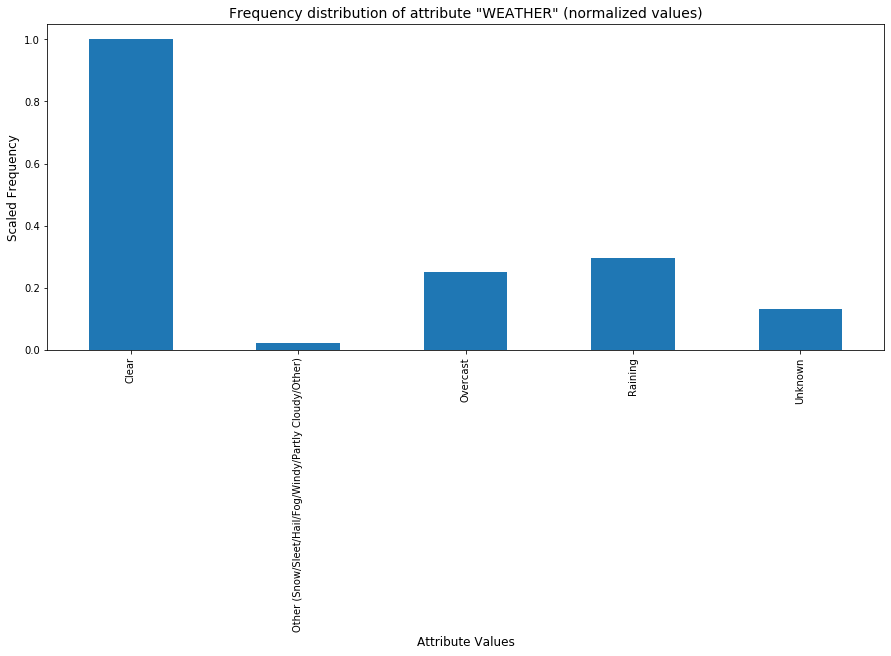

In [82]:
plot_frequency(data_collisions, 'WEATHER')

Let's check the frequency of the "LIGHTCOND" attribute.

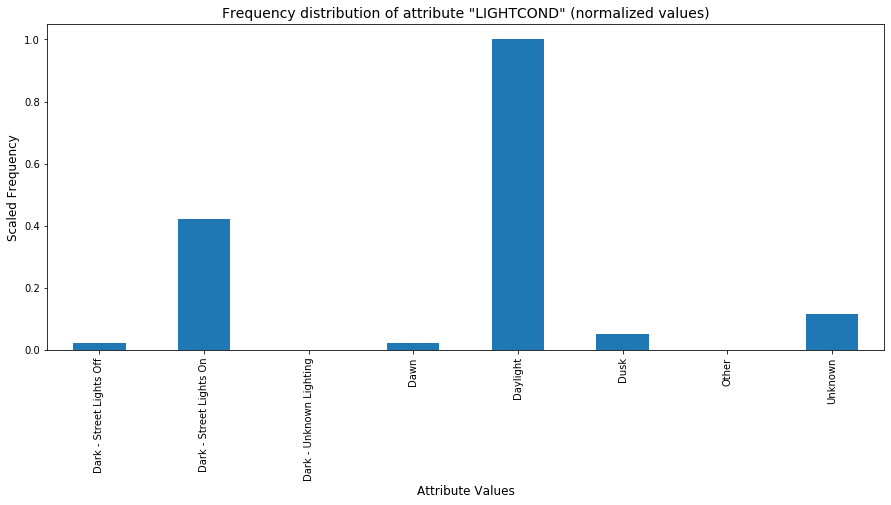

In [83]:
plot_frequency(data_collisions, 'LIGHTCOND')

In [84]:
data_collisions['LIGHTCOND'].value_counts(normalize=True)

Daylight                    0.612231
Dark - Street Lights On     0.257989
Unknown                     0.070131
Dusk                        0.031364
Dark - Street Lights Off    0.014137
Dawn                        0.013081
Other                       0.001006
Dark - Unknown Lighting     0.000061
Name: LIGHTCOND, dtype: float64

The distribution of collisions' number is clearly dependent on the light condition as well. Again, it does seem we may have quite some noise though, with 4 categories (out of 7) accounting for about 5% of total collisions. To reduce the noise, I'll group some of the attribute categories.

In [85]:
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Dark - Street Lights On'].index, 'LIGHTCOND']\
= 'Dark'
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Dark - Street Lights Off'].index, 'LIGHTCOND']\
= 'Dark'
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Dark - Unknown Lighting'].index, 'LIGHTCOND']\
= 'Dark'
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Dusk'].index, 'LIGHTCOND'] = 'Dawn/Dusk'
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Dawn'].index, 'LIGHTCOND'] = 'Dawn/Dusk'
data_collisions.loc[data_collisions[data_collisions['LIGHTCOND'] == 'Other'].index, 'LIGHTCOND'] = 'Unknown'

data_collisions['LIGHTCOND'].value_counts()

Daylight     109568
Dark          48712
Unknown       12731
Dawn/Dusk      7954
Name: LIGHTCOND, dtype: int64

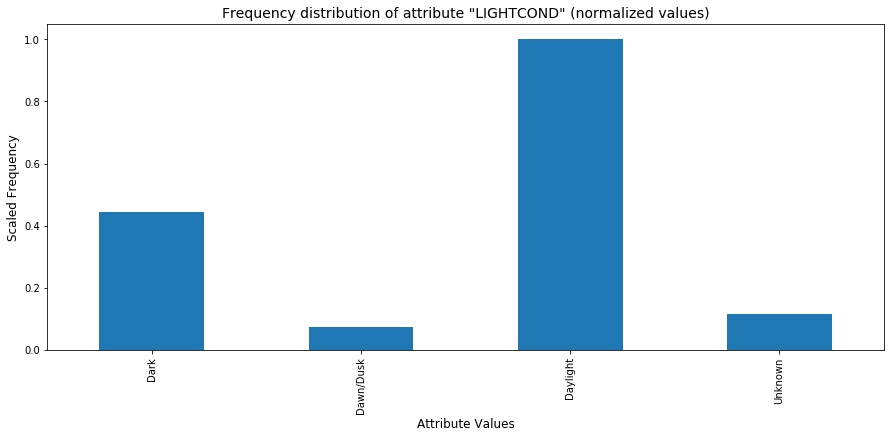

In [86]:
plot_frequency(data_collisions, 'LIGHTCOND')

In [87]:
data_collisions['LIGHTCOND'].value_counts(normalize=True)

Daylight     0.612231
Dark         0.272187
Unknown      0.071137
Dawn/Dusk    0.044444
Name: LIGHTCOND, dtype: float64

#### Feature selection

In [88]:
model1_dataset = data_collisions.groupby(['neighborhood', 'hour_of_day', 'LIGHTCOND', 'WEATHER'])['SEVERITYCODE'].count().to_frame()
model1_dataset.reset_index(inplace=True)
model1_dataset.rename(columns = {'SEVERITYCODE':'number_of_collisions'}, inplace=True)
# Add coulumns "mean" with the mean number of collisions
model1_dataset['mean'] = model1_dataset['number_of_collisions'].mean()

model1_dataset.head()

,neighborhood,hour_of_day,LIGHTCOND,WEATHER,number_of_collisions,mean
0,0,0,Dark,Clear,2181,91.635945
1,0,0,Dark,Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy...,59,91.635945
2,0,0,Dark,Overcast,588,91.635945
3,0,0,Dark,Raining,906,91.635945
4,0,0,Dark,Unknown,115,91.635945


**Risk Classes**

Let's create 2 Risk Classes:
* Risk Code 1 -> Low Risk: input features match a number of collisions **lower than the mean** of total number of collisons.
* Risk Code 2 -> High Risk: input features match a number of collisions **greater or equal to the mean** of total number of collisions.

In [89]:
risk_classes = []

for i in range(len(model1_dataset.index)):
    if model1_dataset.iloc[i]['number_of_collisions'] <  model1_dataset['number_of_collisions'].mean():
        risk_classes.append(1)
    else:
        risk_classes.append(2)
        
model1_dataset['risk_codes'] = risk_classes
model1_dataset.head()

,neighborhood,hour_of_day,LIGHTCOND,WEATHER,number_of_collisions,mean,risk_codes
0,0,0,Dark,Clear,2181,91.635945,2
1,0,0,Dark,Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy...,59,91.635945,1
2,0,0,Dark,Overcast,588,91.635945,2
3,0,0,Dark,Raining,906,91.635945,2
4,0,0,Dark,Unknown,115,91.635945,2


In [90]:
model1_dataset.rename(columns={'WEATHER':'weather', 'LIGHTCOND':'light_conditions'}, inplace=True)

model1_dataset.head()

,neighborhood,hour_of_day,light_conditions,weather,number_of_collisions,mean,risk_codes
0,0,0,Dark,Clear,2181,91.635945,2
1,0,0,Dark,Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy...,59,91.635945,1
2,0,0,Dark,Overcast,588,91.635945,2
3,0,0,Dark,Raining,906,91.635945,2
4,0,0,Dark,Unknown,115,91.635945,2


In [91]:
model1_dataset['risk_codes'].value_counts(normalize=True)

1    0.791091
2    0.208909
Name: risk_codes, dtype: float64

In [92]:
print('The model-1 dataset now contains {} rows, with {} attributes (label column not included).'\
      .format(model1_dataset.shape[0], model1_dataset.shape[1]-1))

The model-1 dataset now contains 1953 rows, with 6 attributes (label column not included).


___

#### 3.1.2. Model 2 - Classification of Collision Severity 

#### Date and Time attributes.

In [93]:
# Let's have a look at the Collision-Severity Classes distribution over the "month" attribute.
data_collisions.groupby(['month'])['SEVERITYCODE'].value_counts(normalize=True)

month  SEVERITYCODE
1      1               0.708888
       2               0.291112
2      1               0.711471
       2               0.288529
3      1               0.701253
       2               0.298747
4      1               0.699022
       2               0.300978
5      1               0.686028
       2               0.313972
6      1               0.697653
       2               0.302347
7      1               0.681176
       2               0.318824
8      1               0.685166
       2               0.314834
9      1               0.695466
       2               0.304534
10     1               0.685725
       2               0.314275
11     1               0.701696
       2               0.298304
12     1               0.716845
       2               0.283155
Name: SEVERITYCODE, dtype: float64

I want to use **ANOVA (Analysis of Variance)** technique to calculate the different F-test scores for several attributes, using as target variable the SEVERITYCODE classification, and compare the scores to check which attribute has the highest, that is the highest variation between different group means (over the variation within the groups).  
The approach of using ANOVA for a categorical target variable (that is not a continuous one) may be unorthdox, but the purpose here is not finding a correlation coefficient between variables, but **comparing the variation of different attribute categories to check whether a particular attribute has a higher impact over the Severity Classification**, and verify if we can discard redundant/irrelevant attributes.

In [94]:
# Let's calculate the F-test score and P-value (confidence degree) of the attribute "month" over the target "SEVERITYCODE".
month_grouped = data_collisions.groupby(['month'])
f_score_month, p_value = stats.f_oneway(month_grouped.get_group(1)['SEVERITYCODE'], month_grouped.get_group(2)['SEVERITYCODE'],\
                                  month_grouped.get_group(3)['SEVERITYCODE'], month_grouped.get_group(4)['SEVERITYCODE'],\
                                  month_grouped.get_group(5)['SEVERITYCODE'], month_grouped.get_group(6)['SEVERITYCODE'],\
                                  month_grouped.get_group(7)['SEVERITYCODE'], month_grouped.get_group(8)['SEVERITYCODE'],\
                                  month_grouped.get_group(9)['SEVERITYCODE'], month_grouped.get_group(10)['SEVERITYCODE'],\
                                  month_grouped.get_group(11)['SEVERITYCODE'], month_grouped.get_group(12)['SEVERITYCODE'])
print(f_score_month, p_value)

9.08747983999812 1.8379765119317586e-16


In [95]:
# Let's have a look at the "day_of_week" attribute distribution over the Collision Severity Classes.
data_collisions.groupby(['day_of_week'])['SEVERITYCODE'].value_counts(normalize=True)

day_of_week  SEVERITYCODE
0            1               0.693434
             2               0.306566
1            1               0.689361
             2               0.310639
2            1               0.690648
             2               0.309352
3            1               0.688022
             2               0.311978
4            1               0.700179
             2               0.299821
5            1               0.703982
             2               0.296018
6            1               0.719892
             2               0.280108
Name: SEVERITYCODE, dtype: float64

In [96]:
# Let's calculate the F-test score and P-value (confidence degree) of the attribute "day_of_week" over the target "SEVERITYCODE"
weekday_grouped = data_collisions.groupby(['day_of_week'])
f_score_weekday, p_value = stats.f_oneway(weekday_grouped.get_group(0)['SEVERITYCODE'],\
                                          weekday_grouped.get_group(1)['SEVERITYCODE'],\
                                          weekday_grouped.get_group(2)['SEVERITYCODE'],\
                                          weekday_grouped.get_group(3)['SEVERITYCODE'],\
                                          weekday_grouped.get_group(4)['SEVERITYCODE'],\
                                          weekday_grouped.get_group(5)['SEVERITYCODE'],\
                                          weekday_grouped.get_group(6)['SEVERITYCODE'])
    
    
print(f_score_weekday, p_value)

13.639657854282587 1.502564900482686e-15


In [97]:
# Let's have a look at the Collision Severity Classes distribution over the "weekend" attribute.
data_collisions.groupby(['weekend'])['SEVERITYCODE'].value_counts(normalize=True)

weekend  SEVERITYCODE
0        1               0.690293
         2               0.309707
1        1               0.706783
         2               0.293217
Name: SEVERITYCODE, dtype: float64

In [98]:
# Let's calculate the F-test score and P-value (confidence degree) of the attribute "weekend" over the target "SEVERITYCODE".
weekend_grouped = data_collisions.groupby(['weekend'])
f_score_weekend, p_value = stats.f_oneway(weekend_grouped.get_group(0)['SEVERITYCODE'],\
                                          weekend_grouped.get_group(1)['SEVERITYCODE'])    
    
print(f_score_weekend, p_value)

56.23912077622821 6.446607191027399e-14


In [99]:
# Let's have a look at the "day_period" attribute distribution over the Collision Severity Classes.
data_collisions.groupby(['day_period'])['SEVERITYCODE'].value_counts(normalize=True)

day_period  SEVERITYCODE
1           1               0.729622
            2               0.270378
2           1               0.694130
            2               0.305870
3           1               0.678090
            2               0.321910
4           1               0.699240
            2               0.300760
Name: SEVERITYCODE, dtype: float64

In [100]:
# Let's calculate the F-test score and P-value (confidence degree) of the attribute "day_period" over the target "SEVERITYCODE".
dayperiod_grouped = data_collisions.groupby(['day_period'])
f_score_dayperiod, p_value = stats.f_oneway(dayperiod_grouped.get_group(1)['SEVERITYCODE'],\
                                            dayperiod_grouped.get_group(2)['SEVERITYCODE'],\
                                            dayperiod_grouped.get_group(3)['SEVERITYCODE'],\
                                            dayperiod_grouped.get_group(4)['SEVERITYCODE'])
    
print(f_score_dayperiod, p_value)

103.00228194421788 1.275936902934677e-66


In [101]:
# Let's have a look at the "hour_of_day" attribute distribution over the Collision Severity Classes.
data_collisions.groupby(['hour_of_day'])['SEVERITYCODE'].value_counts(normalize=True)

hour_of_day  SEVERITYCODE
0            1               0.719217
             2               0.280783
1            1               0.753717
             2               0.246283
2            1               0.757718
             2               0.242282
3            1               0.792041
             2               0.207959
4            1               0.783972
             2               0.216028
5            1               0.705229
             2               0.294771
6            1               0.682935
             2               0.317065
7            1               0.670425
             2               0.329575
8            1               0.685628
             2               0.314372
9            1               0.699133
             2               0.300867
10           1               0.711079
             2               0.288921
11           1               0.705990
             2               0.294010
12           1               0.709578
             2          

In [102]:
# Let's calculate the F-test score and P-value (confidence degree) of the attribute "hour_of_day" over the target "SEVERITYCODE"
hour_grouped = data_collisions.groupby(['hour_of_day'])
f_score_hour, p_value = stats.f_oneway(hour_grouped.get_group(0)['SEVERITYCODE'], hour_grouped.get_group(1)['SEVERITYCODE'],\
                                       hour_grouped.get_group(2)['SEVERITYCODE'], hour_grouped.get_group(3)['SEVERITYCODE'],\
                                       hour_grouped.get_group(4)['SEVERITYCODE'], hour_grouped.get_group(5)['SEVERITYCODE'],\
                                       hour_grouped.get_group(6)['SEVERITYCODE'], hour_grouped.get_group(7)['SEVERITYCODE'],\
                                       hour_grouped.get_group(8)['SEVERITYCODE'], hour_grouped.get_group(9)['SEVERITYCODE'],\
                                       hour_grouped.get_group(10)['SEVERITYCODE'], hour_grouped.get_group(11)['SEVERITYCODE'],\
                                       hour_grouped.get_group(12)['SEVERITYCODE'], hour_grouped.get_group(13)['SEVERITYCODE'],\
                                       hour_grouped.get_group(14)['SEVERITYCODE'], hour_grouped.get_group(15)['SEVERITYCODE'],\
                                       hour_grouped.get_group(16)['SEVERITYCODE'], hour_grouped.get_group(17)['SEVERITYCODE'],\
                                       hour_grouped.get_group(18)['SEVERITYCODE'], hour_grouped.get_group(19)['SEVERITYCODE'],\
                                       hour_grouped.get_group(20)['SEVERITYCODE'], hour_grouped.get_group(21)['SEVERITYCODE'],\
                                       hour_grouped.get_group(22)['SEVERITYCODE'], hour_grouped.get_group(23)['SEVERITYCODE'])
print(f_score_hour, p_value)

31.840191001236775 1.3791479297626871e-139


In [103]:
# Let's create a dictionary with the name of the attribute and the relevant F-test score.
ftest_scores = {'month':f_score_month, 'day_of_week':f_score_weekday, 'hour_of_day':f_score_hour, 'day_period':f_score_dayperiod\
                ,'weekend':f_score_weekend } 
print('Dictionary with attribute name and relevant F-test score:')
ftest_scores

Dictionary with attribute name and relevant F-test score:


{'month': 9.08747983999812,
 'day_of_week': 13.639657854282587,
 'hour_of_day': 31.840191001236775,
 'day_period': 103.00228194421788,
 'weekend': 56.23912077622821}

The F-test scores, by ANOVA technique, show that **the categorization of the daily 24 hours in 4 day periods ("1: night", "2: morning", "3: afternoon", "4: evening") has, by far, the biggest impact on the Collision Severity classification** (a higher distance between group means (and a lower variance within groups) indicates a kind of categorization more capable to explain the target variable because more impactful in establishing the target classes). The attribute **Weekend** is the second most impactful attribute amongst the 5.  
The "attribute **month** is the less impactful.

For building the Feature set of Model-2: Classification of Collision Severity, I am going to discard the less relevant and/or redundant attributes such as:
* INCDATE
* INCDTTM
* month
* day_of_week
* hour_of_day

In [104]:
model2_dataset = data_collisions.copy()
model2_dataset.drop(['INCDATE', 'INCDTTM', 'month', 'day_of_week', 'hour_of_day'], axis=1, inplace=True)
model2_dataset.head()

,SEVERITYCODE,X,Y,WEATHER,LIGHTCOND,day_period,weekend,neighborhood
0,2,-122.323148,47.703140,Overcast,Daylight,3,0,3
1,1,-122.347294,47.647172,Raining,Dark,4,0,1
2,1,-122.334540,47.607871,Overcast,Daylight,2,0,0
3,1,-122.334803,47.604803,Clear,Daylight,2,1,0
4,2,-122.306426,47.545739,Raining,Daylight,2,0,2


In [105]:
print('The model-2 dataset now contains {} number of collisions, with {} attributes (label column not included).'\
      .format(model2_dataset.shape[0], model2_dataset.shape[1]-1))

The model-2 dataset now contains 178965 number of collisions, with 7 attributes (label column not included).


#### Environmental attributes.

Let's analize the Severity-Classes distribution over the WEATHER attribute.

In [106]:
model2_dataset.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                                                SEVERITYCODE
Clear                                                  1               0.676861
                                                       2               0.323139
Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)  1               0.791279
                                                       2               0.208721
Overcast                                               1               0.683781
                                                       2               0.316219
Raining                                                1               0.661198
                                                       2               0.338802
Unknown                                                1               0.941697
                                                       2               0.058303
Name: SEVERITYCODE, dtype: float64

It appears the WEATHER attribute can be used as predictor for the Severity-Classes.

Let's perform the **Analysis of Variance (ANOVA)** to check which one of the different attribute's categorization (before changes vs after changes) is more impactful for predicting the severity classes.

In [107]:
old_ds = pd.read_csv(r'C:\Users\HP\Desktop\COURSERA\IBM Data Science Professional Certificate\9_Applied Data Science Capstone\Data-Collisions.csv')
old_ds.dropna(subset = ['X'], axis = 0, inplace = True)
old_ds.dropna(subset = ['Y'], axis = 0, inplace = True)
old_ds.drop(old_ds[old_ds['PERSONCOUNT'] == 0].index, axis = 0, inplace = True)
old_ds.drop(old_ds[old_ds['VEHCOUNT'] == 0].index, axis = 0, inplace = True)
old_ds.reset_index(drop=True, inplace=True)

old_ds['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
old_ds['WEATHER'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Clear                       105000
Raining                      31207
Overcast                     26488
Unknown                      13911
Snowing                        885
Other                          757
Fog/Smog/Smoke                 531
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [108]:
old_weather_grouped = old_ds.groupby(['WEATHER'])
f_score_old_weather, p_value = stats.f_oneway(old_weather_grouped.get_group('Clear')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Raining')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Overcast')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Unknown')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Snowing')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Other')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Fog/Smog/Smoke')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Sleet/Hail/Freezing Rain')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Blowing Sand/Dirt')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Severe Crosswind')['SEVERITYCODE'],\
                                              old_weather_grouped.get_group('Partly Cloudy')['SEVERITYCODE'])
                                       
print(f_score_old_weather, p_value)

463.68026147354504 0.0


In [109]:
model2_dataset['WEATHER'].value_counts()

Clear                                                    104998
Raining                                                   31207
Overcast                                                  26488
Unknown                                                   13910
Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)      2362
Name: WEATHER, dtype: int64

In [110]:
new_weather_grouped = model2_dataset.groupby(['WEATHER'])
f_score_new_weather, p_value = stats.f_oneway(new_weather_grouped.get_group('Clear')['SEVERITYCODE'],\
                                              new_weather_grouped.get_group('Raining')['SEVERITYCODE'],\
                                              new_weather_grouped.get_group('Overcast')['SEVERITYCODE'],\
                                              new_weather_grouped.get_group('Unknown')['SEVERITYCODE'],\
                                              new_weather_grouped.get_group('Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)')['SEVERITYCODE'])
                                       
print(f_score_new_weather, p_value)

1142.9738661941508 0.0


The new categorization for the WEATHER attribute has a greater F-Test score, so we are going to use the new categories for this attribute to build the Model-2 feature set.  

Let's perform the same analysis for the "LIGHCOND" attribute as well.

In [111]:
old_ds['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)
old_ds.loc[old_ds[old_ds['LIGHTCOND'] == 'Dark - No Street Lights'].index, 'LIGHTCOND'] = 'Dark - Street Lights Off'

old_ds['LIGHTCOND'].value_counts()

Daylight                    109570
Dark - Street Lights On      46171
Unknown                      12552
Dusk                          5613
Dark - Street Lights Off      2530
Dawn                          2341
Other                          180
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [112]:
old_lightcond_grouped = old_ds.groupby(['LIGHTCOND'])
f_score_lc_old, p_value = stats.f_oneway(old_lightcond_grouped.get_group('Daylight')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Dark - Street Lights On')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Unknown')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Dusk')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Dark - Street Lights Off')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Dawn')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Dark - Unknown Lighting')['SEVERITYCODE'],\
                                       old_lightcond_grouped.get_group('Other')['SEVERITYCODE'])
                                       
print(f_score_lc_old, p_value)

637.185856171261 0.0


In [113]:
model2_dataset['LIGHTCOND'].value_counts()

Daylight     109568
Dark          48712
Unknown       12731
Dawn/Dusk      7954
Name: LIGHTCOND, dtype: int64

In [114]:
new_lightcond_grouped = model2_dataset.groupby(['LIGHTCOND'])
f_score_lc_new, p_value = stats.f_oneway(new_lightcond_grouped.get_group('Daylight')['SEVERITYCODE'],\
                                       new_lightcond_grouped.get_group('Dark')['SEVERITYCODE'],\
                                       new_lightcond_grouped.get_group('Unknown')['SEVERITYCODE'],\
                                       new_lightcond_grouped.get_group('Dawn/Dusk')['SEVERITYCODE'])

print(f_score_lc_new, p_value)

1465.7231086571053 0.0


The new categorization of the LIGHTCOND attribute has a greater F-Test score, so we are going to use the new categories for this attribute to build the feature set of Model-2.

#### Feature Selection.

In [115]:
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Blowing Sand/Dirt'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Fog/Smog/Smoke'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Other'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Partly Cloudy'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Severe Crosswind'].index, 'WEATHER'] =\
'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Sleet/Hail/Freezing Rain'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'
model2_dataset.loc[model2_dataset[model2_dataset['WEATHER'] == 'Snowing'].index, 'WEATHER']\
= 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)'

model2_dataset.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                                                SEVERITYCODE
Clear                                                  1               0.676861
                                                       2               0.323139
Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)  1               0.791279
                                                       2               0.208721
Overcast                                               1               0.683781
                                                       2               0.316219
Raining                                                1               0.661198
                                                       2               0.338802
Unknown                                                1               0.941697
                                                       2               0.058303
Name: SEVERITYCODE, dtype: float64

In [116]:
model2_dataset.loc[model2_dataset[model2_dataset['LIGHTCOND'] == 'Dark - Street Lights On'].index, 'LIGHTCOND'] = 'Dark'
model2_dataset.loc[model2_dataset[model2_dataset['LIGHTCOND'] == 'Dark - Street Lights Off'].index, 'LIGHTCOND'] = 'Dark'
model2_dataset.loc[model2_dataset[model2_dataset['LIGHTCOND'] == 'Dark - Unknown Lighting'].index, 'LIGHTCOND'] = 'Dark'
model2_dataset.loc[model2_dataset[model2_dataset['LIGHTCOND'] == 'Dusk'].index, 'LIGHTCOND'] = 'Dawn/Dusk'
model2_dataset.loc[model2_dataset[model2_dataset['LIGHTCOND'] == 'Dawn'].index, 'LIGHTCOND'] = 'Dawn/Dusk'
model2_dataset.loc[model2_dataset[model2_dataset['LIGHTCOND'] == 'Other'].index, 'LIGHTCOND'] = 'Unknown'

model2_dataset.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
Dark       1               0.703995
           2               0.296005
Dawn/Dusk  1               0.668972
           2               0.331028
Daylight   1               0.667202
           2               0.332798
Unknown    1               0.947687
           2               0.052313
Name: SEVERITYCODE, dtype: float64

In [117]:
model2_dataset.rename(columns={'X':'x', 'Y':'y','WEATHER':'weather', 'LIGHTCOND':'light_conditions', 'SEVERITYCODE':\
                                 'severity_classes'}, inplace=True)

model2_dataset.drop(['neighborhood'], axis=1, inplace=True)

model2_dataset.head()

,severity_classes,x,y,weather,light_conditions,day_period,weekend
0,2,-122.323148,47.703140,Overcast,Daylight,3,0
1,1,-122.347294,47.647172,Raining,Dark,4,0
2,1,-122.334540,47.607871,Overcast,Daylight,2,0
3,1,-122.334803,47.604803,Clear,Daylight,2,1
4,2,-122.306426,47.545739,Raining,Daylight,2,0


### 3.2. Data Processing

#### 3.2.1. Model 1 - Classification of Risk

Let's build the feature set for Model-1 (Risk classes) from Model_1 dataset. 

In [118]:
model1_dataset.head()

,neighborhood,hour_of_day,light_conditions,weather,number_of_collisions,mean,risk_codes
0,0,0,Dark,Clear,2181,91.635945,2
1,0,0,Dark,Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy...,59,91.635945,1
2,0,0,Dark,Overcast,588,91.635945,2
3,0,0,Dark,Raining,906,91.635945,2
4,0,0,Dark,Unknown,115,91.635945,2


In [119]:
lightconds = pd.get_dummies(model1_dataset['light_conditions'])
lightconds.rename(columns={'Unknown':'Unknown_light_conds'}, inplace = True)
weather = pd.get_dummies(model1_dataset['weather'])
weather.rename(columns={'Unknown':'Unknown_weather', 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)':\
                        'Other Weather'}, inplace = True)

model1_dataset = pd.concat([model1_dataset, lightconds, weather], axis=1)

model1_dataset.drop(['light_conditions', 'weather', 'number_of_collisions', 'mean'], axis=1, inplace=True)

model1_dataset = model1_dataset[['risk_codes', 'neighborhood', 'hour_of_day', 'Dark', 'Dawn/Dusk', 'Daylight',\
                                   'Unknown_light_conds', 'Clear', 'Other Weather', 'Overcast', 'Raining', 'Unknown_weather']]

model1_dataset.head()

,risk_codes,neighborhood,hour_of_day,Dark,Dawn/Dusk,Daylight,Unknown_light_conds,Clear,Other Weather,Overcast,Raining,Unknown_weather
0,2,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0,0
2,2,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,1,0,0,0,0,0,0,1,0
4,2,0,0,1,0,0,0,0,0,0,0,1


In [120]:
# Let's extract the label column
risk_classes = model1_dataset['risk_codes'].values
risk_classes

array([2, 1, 2, ..., 1, 1, 1], dtype=int64)

In [121]:
risk_classes.shape

(1953,)

In [122]:
# Let's extract the feature set
model1_features = model1_dataset.copy()
model1_features.drop(['risk_codes'], axis=1, inplace=True)
model1_features = model1_features.values
model1_features

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  1,  0,  0],
       ...,
       [ 4, 23,  0, ...,  0,  0,  0],
       [ 4, 23,  0, ...,  1,  0,  0],
       [ 4, 23,  0, ...,  0,  0,  1]], dtype=int64)

In [123]:
model1_features.shape

(1953, 11)

Let's normalize the feature data using data standardization.

In [124]:
normfeat_model1 = StandardScaler().fit(model1_features).transform(model1_features)
normfeat_model1

array([[-1.37106815, -1.73830513,  1.60324169, ..., -0.51149575,
        -0.50431663, -0.48989795],
       [-1.37106815, -1.73830513,  1.60324169, ..., -0.51149575,
        -0.50431663, -0.48989795],
       [-1.37106815, -1.73830513,  1.60324169, ...,  1.95505044,
        -0.50431663, -0.48989795],
       ...,
       [ 1.44830126,  1.6772466 , -0.62373628, ..., -0.51149575,
        -0.50431663, -0.48989795],
       [ 1.44830126,  1.6772466 , -0.62373628, ...,  1.95505044,
        -0.50431663, -0.48989795],
       [ 1.44830126,  1.6772466 , -0.62373628, ..., -0.51149575,
        -0.50431663,  2.04124145]])

___

#### 3.2.2. Model 2 - Classification of Collision Severity 

Let's build the feature set for Model-2 (Severity classes) from Model_2 dataset.

In [125]:
model2_dataset.head()

,severity_classes,x,y,weather,light_conditions,day_period,weekend
0,2,-122.323148,47.703140,Overcast,Daylight,3,0
1,1,-122.347294,47.647172,Raining,Dark,4,0
2,1,-122.334540,47.607871,Overcast,Daylight,2,0
3,1,-122.334803,47.604803,Clear,Daylight,2,1
4,2,-122.306426,47.545739,Raining,Daylight,2,0


In [126]:
lightconds = pd.get_dummies(model2_dataset['light_conditions'])
lightconds.rename(columns={'Unknown':'Unknown_light_conds'}, inplace = True)
weather = pd.get_dummies(model2_dataset['weather'])
weather.rename(columns={'Unknown':'Unknown_weather', 'Other (Snow/Sleet/Hail/Fog/Windy/Partly Cloudy/Other)':\
                        'Other Weather'}, inplace = True)
day_periods = pd.get_dummies(model2_dataset['day_period'])
day_periods.rename(columns={1:'Night', 2:'Morning', 3:'Afternoon', 4:'Evening'}, inplace = True)


model2_dataset = pd.concat([model2_dataset, day_periods, lightconds, weather], axis=1)

model2_dataset.drop(['light_conditions', 'weather', 'day_period'], axis=1, inplace=True)

model2_dataset.head()

,severity_classes,x,y,weekend,Night,Morning,Afternoon,Evening,Dark,Dawn/Dusk,Daylight,Unknown_light_conds,Clear,Other Weather,Overcast,Raining,Unknown_weather
0,2,-122.323148,47.703140,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,-122.347294,47.647172,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,1,-122.334540,47.607871,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,1,-122.334803,47.604803,1,0,1,0,0,0,0,1,0,1,0,0,0,0
4,2,-122.306426,47.545739,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [127]:
# Let's extract the label column
severity_classes = model2_dataset['severity_classes'].values
severity_classes

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [128]:
severity_classes.shape

(178965,)

In [129]:
# Let's extract the feature set
model2_features = model2_dataset.copy()
model2_features.drop(['severity_classes'], axis=1, inplace=True)
model2_features = model2_features.values
model2_features

array([[-122.3231484 ,   47.70314032,    0.        , ...,    1.        ,
           0.        ,    0.        ],
       [-122.3472943 ,   47.64717249,    0.        , ...,    0.        ,
           1.        ,    0.        ],
       [-122.33454   ,   47.60787143,    0.        , ...,    1.        ,
           0.        ,    0.        ],
       ...,
       [-122.3066886 ,   47.68304696,    1.        , ...,    0.        ,
           0.        ,    0.        ],
       [-122.3553167 ,   47.67873428,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-122.2893597 ,   47.61101705,    1.        , ...,    0.        ,
           0.        ,    0.        ]])

In [130]:
model2_features.shape

(178965, 16)

Let's normalize the feature data using data standardization.

In [131]:
normfeat_model2 = StandardScaler().fit(model2_features).transform(model2_features)
normfeat_model2

array([[ 0.24892088,  1.48557876, -0.8540381 , ...,  2.3992615 ,
        -0.45956877, -0.29030146],
       [-0.55540219,  0.48979325, -0.8540381 , ..., -0.41679492,
         2.17595291, -0.29030146],
       [-0.13054424, -0.20945534, -0.8540381 , ...,  2.3992615 ,
        -0.45956877, -0.29030146],
       ...,
       [ 0.7972126 ,  1.12807559,  1.17090795, ..., -0.41679492,
        -0.45956877, -0.29030146],
       [-0.82263603,  1.05134393, -0.8540381 , ..., -0.41679492,
        -0.45956877, -0.29030146],
       [ 1.37445487, -0.15348814,  1.17090795, ..., -0.41679492,
        -0.45956877, -0.29030146]])

## 4. Model Development and Testing <a name="model"></a>

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as m
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
#from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE
%matplotlib inline

### 4.1. Model 1 - Classification of Risk

I will use **K Nearest Neighbor(KNN)** for this model (only in case the model accuracy was not enough satisfactory, I'd use then other classification algorithms and compare the results).

I am going to split the datset in train and test sets.

In [133]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(normfeat_model1, risk_classes, test_size =0.25, random_state=0)

print('Shape of train subset:',x_train_1.shape)
print('Shape of test subset:',x_test_1.shape)

Shape of train subset: (1464, 11)
Shape of test subset: (489, 11)


I run the algorithm with several valus for k, to find the best number of neighbors.

In [134]:
# Trying the model with several values for k (1-20), and record the Accuracy Score of each k for comparison. 
# To avoid an overly generalized algorithm, the greatest value for k is set to 20. 

accuracy_score = []
for k in range(1,21):
    knn_riskclass = KNeighborsClassifier(n_neighbors=k).fit(x_train_1, y_train_1)
    knn_riskprediction = knn_riskclass.predict(x_test_1)
    accuracy_score.append(m.accuracy_score(y_test_1, knn_riskprediction))
                       
print('List of Accuracy-Coefficients:',accuracy_score)
print('')
print('Highest Accuracy-Coefficient:', max(accuracy_score))
print('')
print('K with highest Accuracy-Coefficient:',accuracy_score.index(max(accuracy_score))+1)

List of Accuracy-Coefficients: [0.9284253578732107, 0.9468302658486708, 0.9386503067484663, 0.9447852760736196, 0.9550102249488752, 0.9529652351738241, 0.9550102249488752, 0.9631901840490797, 0.9570552147239264, 0.950920245398773, 0.9406952965235174, 0.9366053169734151, 0.9284253578732107, 0.9263803680981595, 0.9243353783231084, 0.9263803680981595, 0.9202453987730062, 0.9222903885480572, 0.9141104294478528, 0.9120654396728016]

Highest Accuracy-Coefficient: 0.9631901840490797

K with highest Accuracy-Coefficient: 8


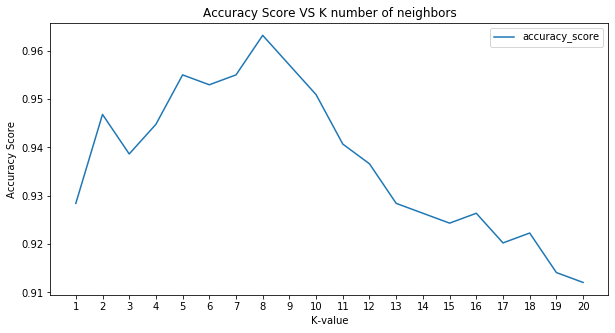

In [135]:
#create a dataframe with the the score values for plotting
accuracy_score = pd.DataFrame(accuracy_score)
accuracy_score.rename(columns={0:'accuracy_score'}, inplace=True)
accuracy_score['k_value'] = accuracy_score.index+1

#plot the dataframe
accuracy_score.plot('k_value', 'accuracy_score', figsize=(10,5))
plt.ylabel('Accuracy Score')
plt.xlabel('K-value')
plt.title('Accuracy Score VS K number of neighbors')
plt.xticks(ticks = range(1,21))
plt.show()

The best K value seems to be 8. So we set our KNN algorithm with a k-value equals to 8.

In [136]:
knn_riskclass = KNeighborsClassifier(n_neighbors=8).fit(x_train_1, y_train_1)
knn_riskprediction = knn_riskclass.predict(x_test_1)
knn_riskprediction[0:10]

array([1, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64)

Let's perform Confusion Matrix analysis, for further digging into the results.

[[391   1]
 [ 17  80]]


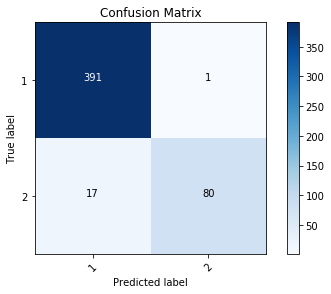

In [137]:
confusion_matrix(y_test_1, knn_riskprediction, labels=[1,2])

#Define a function for better visualization of Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Plot the Confusion Matrix
knn_riskcm = confusion_matrix(y_test_1, knn_riskprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_riskcm, classes=[1,2], normalize= False,  title='Confusion Matrix')

In [138]:
# Let's visualize the Classification Report
print(classification_report(y_test_1, knn_riskprediction))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       392
           2       0.99      0.82      0.90        97

    accuracy                           0.96       489
   macro avg       0.97      0.91      0.94       489
weighted avg       0.96      0.96      0.96       489



**Very good!** Not only we have obtained a very high accuracy score (96%), but, despite the fact that the dataset is quite imbalanced, we've got a very high F1-score (the harmonic average of precision and recall), which means our model is able to predict cases classified as 2 (higher risk of getting into a car accident) with almost perfect precision (99%) and good recall as well (82%).

___

### 4.2. Model 2 - Classification of Collision Severity

I will develop different classification models and compare the results to choose the best one. Considering the size of the dataset (178,965 rows), I won't use algorithms that work well with small databases like Support Vector Machine.  
Following algorithms have been selected:
* Decision Tree
* Logistic Regression
* K Nearest Neighbor (KNN)

I am going to split the datset in train and test sets.

In [164]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(normfeat_model2, severity_classes, test_size =0.25, random_state=0)

print('Shape of train subset:',x_train_2.shape)
print('Shape of test subset:',x_test_2.shape)

Shape of train subset: (134223, 16)
Shape of test subset: (44742, 16)


#### 4.2.1. Decision Tree

In [165]:
#Build and train a Decision Tree model, using the train subset. For the time being, i don not set any max depth.
dt_severityclass = DecisionTreeClassifier(criterion = 'entropy')
dt_severityclass.fit(x_train_2, y_train_2)
dt_severityprediction = dt_severityclass.predict(x_test_2)
print(dt_severityprediction.shape)

(44742,)


In [166]:
dt_severityprediction[0:10]

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 1], dtype=int64)

In [167]:
m.f1_score(y_test_2, dt_severityprediction, average='weighted')

0.6199689196043938

In [168]:
dt_severityclass = DecisionTreeClassifier(criterion = 'entropy', max_depth=None)
dt_severityclass.fit(x_train_2, y_train_2)
dt_severityprediction = dt_severityclass.predict(x_test_2)

[[23799  7401]
 [ 9216  4326]]
              precision    recall  f1-score   support

           1       0.72      0.76      0.74     31200
           2       0.37      0.32      0.34     13542

    accuracy                           0.63     44742
   macro avg       0.54      0.54      0.54     44742
weighted avg       0.61      0.63      0.62     44742



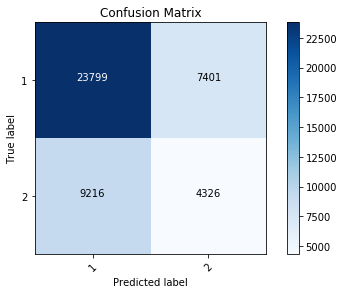

In [169]:
dt_cnf_mx = confusion_matrix(y_test_2, dt_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(dt_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, dt_severityprediction))

#### 4.2.3. Logistic Regression

In [170]:
# Let's run the Logistic Regression algorithm with different solvers and let's pick the solver wuth the highest F1 score.
f1_score = {}
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for i in range(0,5):
    solver= solver_list[i]
    lr_severityclass = LogisticRegression(C=1.0, solver = solver)
    lr_severityclass.fit(x_train_2, y_train_2)
    lr_severityprediction = lr_severityclass.predict(x_test_2)
    
    f1_score[solver] = m.f1_score(y_test_2, lr_severityprediction, average='weighted')
    
print('Dictionary "Solver: F1-Score":', f1_score)
print('Solver with greatest F1-Score:', list(f1_score.keys())[list(f1_score.values()).index(max(f1_score.values()))])
print('Greatest F1-Score:',max(list(f1_score.values())))

Dictionary "Solver: F1-Score": {'liblinear': 0.5729830300713635, 'newton-cg': 0.5729830300713635, 'lbfgs': 0.5729830300713635, 'sag': 0.5729830300713635, 'saga': 0.5729830300713635}
Solver with greatest F1-Score: liblinear
Greatest F1-Score: 0.5729830300713635


In [171]:
# Now, let's run the Logistic Regression algorithm with different regularization paramreter and let's pick the one with the\
# greatest F1 score.
f1_score = {}

for i in np.arange(0.1, 2.1, 0.1):
    lr_severityclass = LogisticRegression(C=i, solver = 'liblinear', max_iter = 2000)
    lr_severityclass.fit(x_train_2, y_train_2)
    lr_severityprediction = lr_severityclass.predict(x_test_2)

    f1_score[round(i,1)] = m.f1_score(y_test_2, lr_severityprediction, average='weighted')
    

print('Dictionary - Regularization parameter : F1-Score:', f1_score)
print('Regularization parameter with the greatest F1-Score:',\
      list(f1_score.keys())[list(f1_score.values()).index(max(f1_score.values()))])
print('Greatest F1-Score:',max(list(f1_score.values())))

Dictionary - Regularization parameter : F1-Score: {0.1: 0.5729830300713635, 0.2: 0.5729830300713635, 0.3: 0.5729830300713635, 0.4: 0.5729830300713635, 0.5: 0.5729830300713635, 0.6: 0.5729830300713635, 0.7: 0.5729830300713635, 0.8: 0.5729830300713635, 0.9: 0.5729830300713635, 1.0: 0.5729830300713635, 1.1: 0.5729830300713635, 1.2: 0.5729830300713635, 1.3: 0.5729830300713635, 1.4: 0.5729830300713635, 1.5: 0.5729830300713635, 1.6: 0.5729830300713635, 1.7: 0.5729830300713635, 1.8: 0.5729830300713635, 1.9: 0.5729830300713635, 2.0: 0.5729830300713635}
Regularization parameter with the greatest F1-Score: 0.1
Greatest F1-Score: 0.5729830300713635


In [147]:
lr_severityclass = LogisticRegression(C=0.1, solver = 'liblinear', max_iter = 2000)
lr_severityclass.fit(x_train_2, y_train_2)
lr_severityprediction = lr_severityclass.predict(x_test_2)

[[31200     0]
 [13542     0]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.70      1.00      0.82     31200
           2       0.00      0.00      0.00     13542

    accuracy                           0.70     44742
   macro avg       0.35      0.50      0.41     44742
weighted avg       0.49      0.70      0.57     44742



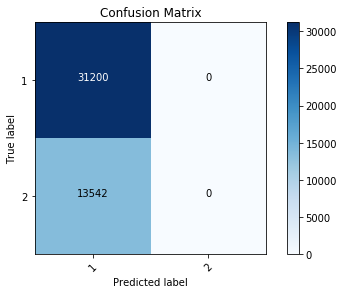

In [172]:
lr_cnf_mx = confusion_matrix(y_test_2, lr_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(lr_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, lr_severityprediction))

#### 4.2.3. K-Nearest-Neighbors (KNN)

In [151]:
# Trying the model with several values for k (1-20), and record the F1 Score of each k for comparison. 
# To avoid an overly generalized algorithm, the greatest value for k is set to 20. 

f1_score = []
with tqdm(position=0, leave=True) as pbar:
    for k in tqdm(range(1,21), position=0, leave=True):
        knn_severityclass = KNeighborsClassifier(n_neighbors=k).fit(x_train_2, y_train_2)
        knn_severityprediction = knn_severityclass.predict(x_test_2)
        f1_score.append(m.f1_score(y_test_2, knn_severityprediction, average='weighted'))
                       
print('List of F1_score:', f1_score)
print('')
print('K with greatest F1-Score:', f1_score.index(max(f1_score))+1)
print('')
print('Greatest F1-Score:', max(f1_score))

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [2:18:15<00:00, 414.80s/it]
0it [2:18:15, ?it/s]

List of F1_score: [0.6058092564757912, 0.6133551489281276, 0.6186398669668145, 0.6148642044420151, 0.6184502452882119, 0.6118870745350268, 0.6186518567677415, 0.6098124892459827, 0.6167739624714251, 0.6070240734671312, 0.6164403722401006, 0.6054042972833407, 0.613293080580079, 0.6034394537496613, 0.6103834962739314, 0.6014790923354325, 0.6097579721423947, 0.6017675571148559, 0.6082551426832477, 0.5992300575602509]

K with greatest F1-Score: 7

Greatest F1-Score: 0.6186518567677415


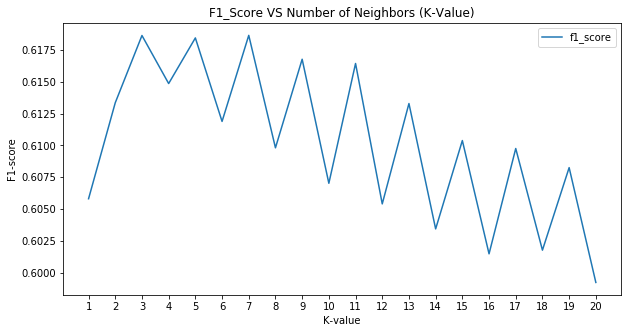

In [152]:
#create a dataframe with the score values for plotting
f1_score = pd.DataFrame(f1_score)
f1_score['f1_score'] = f1_score[0]
f1_score.drop([0], axis=1, inplace=True)
f1_score['k_value'] = f1_score.index+1

#plot the dataframe
f1_score.plot('k_value', 'f1_score', figsize=(10,5))
plt.ylabel('F1-score')
plt.xlabel('K-value')
plt.title('F1_Score VS Number of Neighbors (K-Value)')
plt.xticks(ticks = range(1,21))
plt.show()

The best K value seems to be 7. So we set our KNN algorithm with a k-value equals to 7.

In [173]:
knn_severityclass = KNeighborsClassifier(n_neighbors=7).fit(x_train_2, y_train_2)
knn_severityprediction = knn_severityclass.predict(x_test_2)
knn_severityprediction[0:10]

array([1, 2, 1, 2, 2, 1, 1, 1, 1, 1], dtype=int64)

Let's perform Confusion Matrix analysis, for further digging into the results.

[[26438  4762]
 [10769  2773]]
              precision    recall  f1-score   support

           1       0.71      0.85      0.77     31200
           2       0.37      0.20      0.26     13542

    accuracy                           0.65     44742
   macro avg       0.54      0.53      0.52     44742
weighted avg       0.61      0.65      0.62     44742



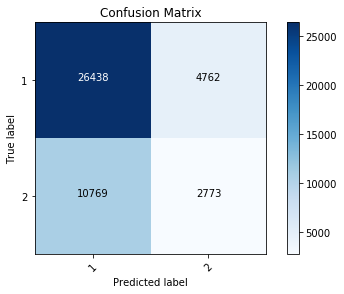

In [174]:
knn_severitycm = confusion_matrix(y_test_2, knn_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_severitycm, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, knn_severityprediction))

#### 4.2.4. Report Table

In [175]:
Algorithm = ['Decision_Tree', 'Logistic_regression', 'KNN']
report = pd.DataFrame()
report['Algorithm'] = Algorithm
report

,Algorithm
0,Decision_Tree
1,Logistic_regression
2,KNN


In [176]:
report['Accuracy_score'] = [m.accuracy_score(y_test_2, dt_severityprediction),\
                            m.accuracy_score(y_test_2, lr_severityprediction),\
                            m.accuracy_score(y_test_2, knn_severityprediction)] 

report['F1-score'] = [m.f1_score(y_test_2, dt_severityprediction, average='weighted'),\
                      m.f1_score(y_test_2, lr_severityprediction, average='weighted'),\
                      m.f1_score(y_test_2, knn_severityprediction, average='weighted')]

report

,Algorithm,Accuracy_score,F1-score
0,Decision_Tree,0.628604,0.620514
1,Logistic_regression,0.697331,0.572983
2,KNN,0.652876,0.618652


Looking at the performance scores, Logistis Regression algorithm has the greatest accuracy, but the smallest F1_Score; that's because Logistic Regression performed very poorly on the minority class prediction (code=2); therefore, despite the highest accuracy, **Logistic Regression's definitely the algorithm that performed worst.**


**Decision Tree and KNN** algorithms have very similar F1 scores, but KNN has a slightly greater accuracy, although Decision Tree seems to perform better on predicting cases belonging to the minority class (see the Confusion Matrices above).  
However, the minority class (severity code = 2) has quite low precision, recall, and F1-Score values for all 3 algorithms. I'll try, then, to run the algorithms again using some resampling techniques such as:

* Oversample minority class
* Undersample majority class
* Generate synthetic samples (SMOTE)

___

#### 4.2.5 Oversample minority class (training data)

In [177]:
# create 2 dataframes: features (x) and target (y)
y = model2_dataset['severity_classes']
x = model2_dataset.drop(['severity_classes'], axis =1)

# setting up testing and training sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.25, random_state=0)

# concatenate the training data back together
training_data = pd.concat([x_train_2, y_train_2], axis=1)

# separate minority and majority classes
class_1 = training_data[training_data['severity_classes']==1]
class_2 = training_data[training_data['severity_classes']==2]

# upsample minority class
class_2_upsampled = resample(class_2,
                          replace=True, # sample with replacement
                          n_samples=int(len(class_1)), # match majority class number
                          random_state=0) # seed

# combine majority and upsampled minority
upsampled = pd.concat([class_1, class_2_upsampled])

# check new class counts
upsampled['severity_classes'].value_counts()

2    93583
1    93583
Name: severity_classes, dtype: int64

In [178]:
os_x_train_2 = upsampled.drop(['severity_classes'], axis=1).values
os_y_train_2 = upsampled['severity_classes'].values

norm_os_x_train_2 = StandardScaler().fit(os_x_train_2).transform(os_x_train_2)
norm_x_test_2 = StandardScaler().fit(x_test_2).transform(x_test_2)

#### DECISION TREE

In [179]:
os_dt_severityclass = DecisionTreeClassifier(criterion = 'entropy', max_depth=None)
os_dt_severityclass.fit(norm_os_x_train_2, os_y_train_2)
os_dt_severityprediction = os_dt_severityclass.predict(norm_x_test_2)

os_dt_severityprediction[0:10]

array([2, 2, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

[[23064  8136]
 [ 9262  4280]]
              precision    recall  f1-score   support

           1       0.71      0.74      0.73     31200
           2       0.34      0.32      0.33     13542

    accuracy                           0.61     44742
   macro avg       0.53      0.53      0.53     44742
weighted avg       0.60      0.61      0.61     44742



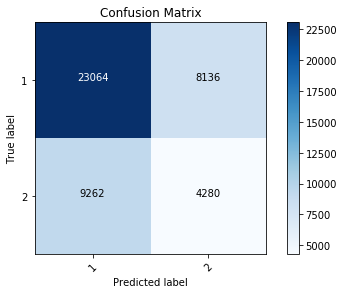

In [181]:
dt_cnf_mx = confusion_matrix(y_test_2, os_dt_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(dt_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, os_dt_severityprediction))

#### LOGISTIC REGRESSION

In [182]:
os_lr_severityclass = LogisticRegression(C=0.1, solver='liblinear', max_iter=2000)
os_lr_severityclass.fit(norm_os_x_train_2, os_y_train_2)
os_lr_severityprediction = os_lr_severityclass.predict(norm_x_test_2)

os_lr_severityprediction[0:10]

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

[[ 8087 23113]
 [ 1812 11730]]
              precision    recall  f1-score   support

           1       0.82      0.26      0.39     31200
           2       0.34      0.87      0.48     13542

    accuracy                           0.44     44742
   macro avg       0.58      0.56      0.44     44742
weighted avg       0.67      0.44      0.42     44742



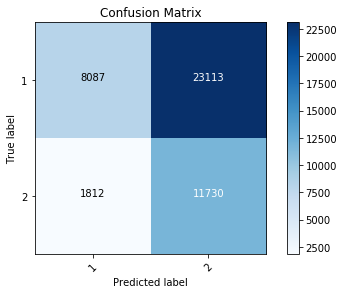

In [184]:
lr_cnf_mx = confusion_matrix(y_test_2, os_lr_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(lr_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, os_lr_severityprediction))

#### K-NEAREST-NEIGHBORS (KNN)

In [185]:
os_knn_severityclass = KNeighborsClassifier(n_neighbors=7).fit(norm_os_x_train_2, os_y_train_2)
os_knn_severityprediction = os_knn_severityclass.predict(norm_x_test_2)
os_knn_severityprediction[0:10]

array([1, 1, 1, 2, 2, 1, 1, 2, 1, 1], dtype=int64)

[[18860 12340]
 [ 7161  6381]]
              precision    recall  f1-score   support

           1       0.72      0.60      0.66     31200
           2       0.34      0.47      0.40     13542

    accuracy                           0.56     44742
   macro avg       0.53      0.54      0.53     44742
weighted avg       0.61      0.56      0.58     44742



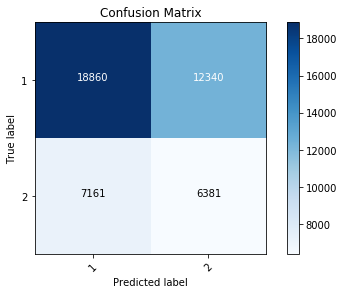

In [186]:
knn_severitycm = confusion_matrix(y_test_2, os_knn_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_severitycm, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, os_knn_severityprediction))

___

#### 4.2.6 Undersample majority class (training data)

In [187]:
# downsample majority
class_1_downsampled = resample(class_1,
                          replace=False, # sample without replacement
                          n_samples=int(len(class_2)), # match minority class number
                          random_state=0) # seed

# combine downsampled majority and minority
downsampled = pd.concat([class_1_downsampled, class_2])

# check new class counts
downsampled['severity_classes'].value_counts()

2    40640
1    40640
Name: severity_classes, dtype: int64

In [188]:
us_x_train_2 = downsampled.drop(['severity_classes'], axis=1).values
us_y_train_2 = downsampled['severity_classes'].values

norm_us_x_train_2 = StandardScaler().fit(us_x_train_2).transform(us_x_train_2)

#### DECISION TREE

In [189]:
us_dt_severityclass = DecisionTreeClassifier(criterion = 'entropy')
us_dt_severityclass.fit(norm_us_x_train_2, us_y_train_2)
us_dt_severityprediction = us_dt_severityclass.predict(norm_x_test_2)
us_dt_severityprediction[0:10]

array([2, 2, 1, 1, 2, 1, 2, 2, 2, 1], dtype=int64)

[[18497 12703]
 [ 7186  6356]]
              precision    recall  f1-score   support

           1       0.72      0.59      0.65     31200
           2       0.33      0.47      0.39     13542

    accuracy                           0.56     44742
   macro avg       0.53      0.53      0.52     44742
weighted avg       0.60      0.56      0.57     44742



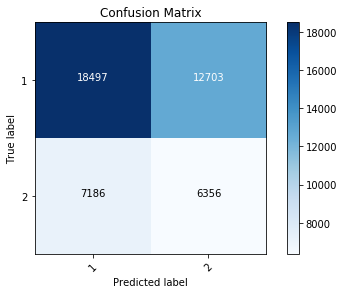

In [190]:
dt_cnf_mx = confusion_matrix(y_test_2, us_dt_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(dt_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, us_dt_severityprediction))

#### LOGISTIC REGRESSION

In [191]:
us_lr_severityclass = LogisticRegression(C=0.1, solver='liblinear', max_iter=2000)
us_lr_severityclass.fit(norm_us_x_train_2, us_y_train_2)
us_lr_severityprediction = us_lr_severityclass.predict(norm_x_test_2)
us_lr_severityprediction[0:10]

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1], dtype=int64)

[[ 7929 23271]
 [ 1762 11780]]
              precision    recall  f1-score   support

           1       0.82      0.25      0.39     31200
           2       0.34      0.87      0.48     13542

    accuracy                           0.44     44742
   macro avg       0.58      0.56      0.44     44742
weighted avg       0.67      0.44      0.42     44742



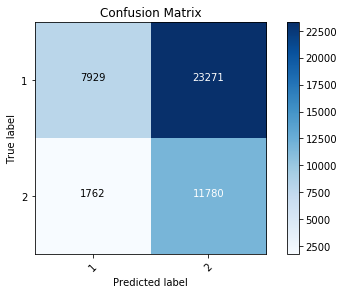

In [192]:
lr_cnf_mx = confusion_matrix(y_test_2, us_lr_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(lr_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, us_lr_severityprediction))

#### K-NEAREST-NEIGHBORS (KNN)

In [193]:
us_knn_severityclass = KNeighborsClassifier(n_neighbors=7).fit(norm_us_x_train_2, us_y_train_2)
us_knn_severityprediction = us_knn_severityclass.predict(norm_x_test_2)
us_knn_severityprediction[0:10]

array([1, 2, 2, 2, 2, 1, 2, 2, 2, 1], dtype=int64)

[[16993 14207]
 [ 6133  7409]]
              precision    recall  f1-score   support

           1       0.73      0.54      0.63     31200
           2       0.34      0.55      0.42     13542

    accuracy                           0.55     44742
   macro avg       0.54      0.55      0.52     44742
weighted avg       0.62      0.55      0.56     44742



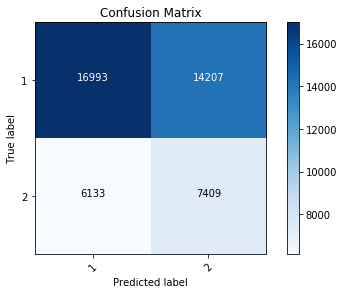

In [194]:
knn_severitycm = confusion_matrix(y_test_2, us_knn_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_severitycm, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, us_knn_severityprediction))

___

#### 4.2.7 Generate synthetic samples (SMOTE - training data)

In [195]:
sm = SMOTE(random_state=0)
sm_x_train_2, sm_y_train_2 = sm.fit_sample(x_train_2, y_train_2)

In [196]:
# Let's check the shape of the train sets (features and target)
print(sm_x_train_2.shape)
print(sm_y_train_2.shape)

(187166, 16)
(187166,)


In [197]:
# Let's normalize the train set
norm_sm_x_train_2 = StandardScaler().fit(sm_x_train_2).transform(sm_x_train_2)

#### DECISION TREE

In [198]:
sm_dt_severityclass = DecisionTreeClassifier(criterion = 'entropy', max_depth=None)
sm_dt_severityclass.fit(norm_sm_x_train_2, sm_y_train_2)
sm_dt_severityprediction = sm_dt_severityclass.predict(norm_x_test_2)
sm_dt_severityprediction[0:10]

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 2], dtype=int64)

[[16764 14436]
 [ 6280  7262]]
              precision    recall  f1-score   support

           1       0.73      0.54      0.62     31200
           2       0.33      0.54      0.41     13542

    accuracy                           0.54     44742
   macro avg       0.53      0.54      0.52     44742
weighted avg       0.61      0.54      0.56     44742



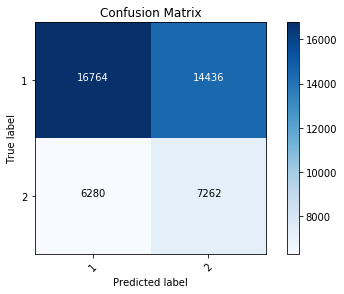

In [199]:
dt_cnf_mx = confusion_matrix(y_test_2, sm_dt_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(dt_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, sm_dt_severityprediction))

#### LOGISTIC REGRESSION

In [200]:
sm_lr_severityclass = LogisticRegression(C=0.1, solver = 'liblinear', max_iter = 2000)
sm_lr_severityclass.fit(norm_sm_x_train_2, sm_y_train_2)
sm_lr_severityprediction = sm_lr_severityclass.predict(norm_x_test_2)

[[ 8603 22597]
 [ 2012 11530]]
              precision    recall  f1-score   support

           1       0.81      0.28      0.41     31200
           2       0.34      0.85      0.48     13542

    accuracy                           0.45     44742
   macro avg       0.57      0.56      0.45     44742
weighted avg       0.67      0.45      0.43     44742



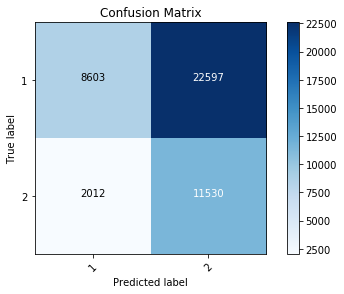

In [201]:
lr_cnf_mx = confusion_matrix(y_test_2, sm_lr_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(lr_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, sm_lr_severityprediction))

#### K-NEAREST-NEIGHBORS (KNN)

In [203]:
sm_knn_severityclass = KNeighborsClassifier(n_neighbors=7).fit(norm_sm_x_train_2, sm_y_train_2)
sm_knn_severityprediction = sm_knn_severityclass.predict(norm_x_test_2)
sm_knn_severityprediction[0:10]

array([1, 2, 1, 2, 2, 1, 1, 2, 1, 1], dtype=int64)

[[18427 12773]
 [ 6757  6785]]
              precision    recall  f1-score   support

           1       0.73      0.59      0.65     31200
           2       0.35      0.50      0.41     13542

    accuracy                           0.56     44742
   macro avg       0.54      0.55      0.53     44742
weighted avg       0.62      0.56      0.58     44742



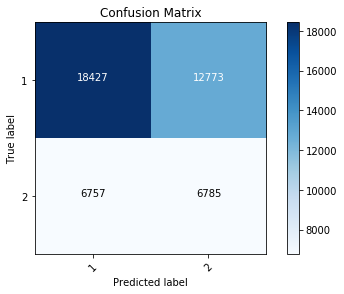

In [204]:
knn_severitycm = confusion_matrix(y_test_2, sm_knn_severityprediction, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_severitycm, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(y_test_2, sm_knn_severityprediction))

#### 4.2.8. Report Table 2

In [209]:
datasets = ['No_resample', 'Oversampled_minority', 'Undersampled_majority', 'Synthetic_samples_(SMOTE)']
report_1 = pd.DataFrame()
report_1['Dataset'] = datasets
report_1

,Dataset
0,No_resample
1,Oversampled_minority
2,Undersampled_majority
3,Synthetic_samples_(SMOTE)


In [210]:
report_1['Dec_Tree - F1'] = [m.f1_score(y_test_2, dt_severityprediction, average='weighted'),\
                                  m.f1_score(y_test_2, os_dt_severityprediction, average='weighted'),\
                                  m.f1_score(y_test_2, us_dt_severityprediction, average='weighted'),\
                                  m.f1_score(y_test_2, sm_dt_severityprediction, average='weighted')]

report_1['Log_regr - F1'] = [m.f1_score(y_test_2, lr_severityprediction, average='weighted'),\
                                        m.f1_score(y_test_2, os_lr_severityprediction, average='weighted'),\
                                        m.f1_score(y_test_2, us_lr_severityprediction, average='weighted'),\
                                        m.f1_score(y_test_2, sm_lr_severityprediction, average='weighted')]

report_1['KNN - F1'] = [m.f1_score(y_test_2, knn_severityprediction, average='weighted'),\
                        m.f1_score(y_test_2, os_knn_severityprediction, average='weighted'),\
                        m.f1_score(y_test_2, us_knn_severityprediction, average='weighted'),\
                        m.f1_score(y_test_2, sm_knn_severityprediction, average='weighted')]

report_1['Dec_Tree - Accuracy'] = [m.accuracy_score(y_test_2, dt_severityprediction),\
                                        m.accuracy_score(y_test_2, os_dt_severityprediction),\
                                        m.accuracy_score(y_test_2, us_dt_severityprediction),\
                                        m.accuracy_score(y_test_2, sm_dt_severityprediction)]

report_1['Log_regr - Accuracy'] = [m.accuracy_score(y_test_2, lr_severityprediction),\
                                              m.accuracy_score(y_test_2, os_lr_severityprediction),\
                                              m.accuracy_score(y_test_2, us_lr_severityprediction),\
                                              m.accuracy_score(y_test_2, sm_lr_severityprediction)]

report_1['KNN - Accuracy'] = [m.accuracy_score(y_test_2, knn_severityprediction),\
                              m.accuracy_score(y_test_2, os_knn_severityprediction),\
                              m.accuracy_score(y_test_2, us_knn_severityprediction),\
                              m.accuracy_score(y_test_2, sm_knn_severityprediction)]

report_1

,Dataset,Dec_Tree - F1,Log_regr - F1,KNN - F1,Dec_Tree - Accuracy,Log_regr - Accuracy,KNN - Accuracy
0,No_resample,0.620514,0.572983,0.618652,0.628604,0.697331,0.652876
1,Oversampled_minority,0.606161,0.421178,0.579404,0.611148,0.442917,0.564146
2,Undersampled_majority,0.571530,0.417180,0.563811,0.555474,0.440503,0.545394
3,Synthetic_samples_(SMOTE),0.555761,0.433354,0.579878,0.536990,0.449980,0.563497


## 5. Results - Cross Validation <a name="results"></a>

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### 5.1. Model 1 - Classification of Risk

In [252]:
knn_riskclass = KNeighborsClassifier(n_neighbors=8)
knn_f1_scores = cross_val_score(knn_riskclass, normfeat_model1, risk_classes, cv=4, scoring='f1_weighted')
knn_f1_scores

array([0.8749408 , 0.94223017, 0.88995185, 0.89225499])

In [253]:
knn_accuracy_scores = cross_val_score(knn_riskclass, normfeat_model1, risk_classes, cv=4, scoring='accuracy')
knn_accuracy_scores

array([0.87321063, 0.94467213, 0.89139344, 0.89754098])

In [257]:
print('Model 1 - "Classification of Risk" average F1-score:', round(knn_f1_scores.mean(),2))
print('Model 1 - "Classification of Risk" average accuracy score:', round(knn_accuracy_scores.mean(),2))

Model 1 - "Classification of Risk" average F1-score: 0.9
Model 1 - "Classification of Risk" average accuracy score: 0.9


In [255]:
knn_riskclass_cross = cross_val_predict(knn_riskclass, normfeat_model1, risk_classes, cv=4)
knn_riskclass_cross[0:10]

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

[[1471   74]
 [ 118  290]]
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1545
           2       0.80      0.71      0.75       408

    accuracy                           0.90      1953
   macro avg       0.86      0.83      0.85      1953
weighted avg       0.90      0.90      0.90      1953



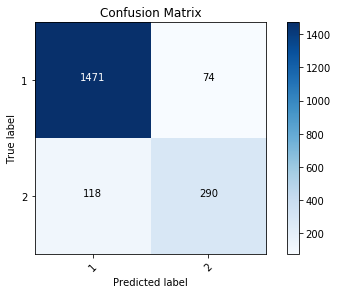

In [256]:
knn_cnf_mx = confusion_matrix(risk_classes, knn_riskclass_cross, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(risk_classes, knn_riskclass_cross))

The Model 1 – Classification of Risk of getting into a car accident performs very well.

### 5.2. Model 2 - Classification of Collision Severity

#### 5.2.1. Decision Tree

In [238]:
dt_severityclass = DecisionTreeClassifier(criterion = 'entropy')
dt_f1_scores = cross_val_score(dt_severityclass, normfeat_model2, severity_classes, cv=4, scoring='f1_weighted')
dt_f1_scores

array([0.61134176, 0.62136219, 0.6227134 , 0.61227599])

In [239]:
dt_accuracy_scores = cross_val_score(dt_severityclass, normfeat_model2, severity_classes, cv=4, scoring='accuracy')
dt_accuracy_scores

array([0.61966385, 0.6312331 , 0.63058492, 0.614537  ])

In [240]:
print('Model 2: "Classification of Collision Severity" - Decision Tree average F1-score:', round(dt_f1_scores.mean(),2))
print('Model 2: "Classification of Collision Severity" - Decision Tree average accuracy score:',\
      round(dt_accuracy_scores.mean(),2))

Model 2: "Classification of Collision Severity" - Decision Tree average F1-score: 0.62
Model 2: "Classification of Collision Severity" - Decision Tree average accuracy score: 0.62


In [244]:
dt_severityprediction_cross = cross_val_predict(dt_severityclass, normfeat_model2, severity_classes, cv=4)
dt_severityprediction_cross[0:10]

array([2, 1, 1, 1, 1, 2, 2, 2, 1, 1], dtype=int64)

[[94424 30359]
 [36811 17371]]
              precision    recall  f1-score   support

           1       0.72      0.76      0.74    124783
           2       0.36      0.32      0.34     54182

    accuracy                           0.62    178965
   macro avg       0.54      0.54      0.54    178965
weighted avg       0.61      0.62      0.62    178965



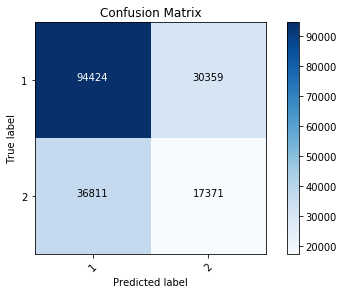

In [250]:
dt_cnf_mx = confusion_matrix(severity_classes, dt_severityprediction_cross, labels=[1,2])
plt.figure()
plot_confusion_matrix(dt_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(severity_classes, dt_severityprediction_cross))

#### 5.2.2. K-Nearest-Neighbors (KNN)

In [235]:
knn_severityclass = KNeighborsClassifier(n_neighbors=7)
f1_scores = cross_val_score(knn_severityclass, normfeat_model2, severity_classes, cv=4, scoring='f1_weighted')
f1_scores

array([0.6190651 , 0.61986811, 0.62032896, 0.61370243])

In [236]:
accuracy_scores = cross_val_score(knn_severityclass, normfeat_model2, severity_classes, cv=4, scoring='accuracy')
accuracy_scores

array([0.65428456, 0.65926108, 0.65436624, 0.64281084])

In [243]:
print('Model 2 - "Classification of Collision Severity" - KNN average F1-score:', round(f1_scores.mean(),2))
print('Model 2 - "Classification of Collision Severity" - KNN average accuracy score:', round(accuracy_scores.mean(),2))

Model 2 - "Classification of Collision Severity" - KNN average F1-score: 0.62
Model 2 - "Classification of Collision Severity" - KNN average accuracy score: 0.65


In [248]:
knn_severityprediction_cross = cross_val_predict(knn_severityclass, normfeat_model2, severity_classes, cv=4)
knn_severityprediction_cross[0:10]

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1], dtype=int64)

[[105753  19030]
 [ 43128  11054]]
              precision    recall  f1-score   support

           1       0.71      0.85      0.77    124783
           2       0.37      0.20      0.26     54182

    accuracy                           0.65    178965
   macro avg       0.54      0.53      0.52    178965
weighted avg       0.61      0.65      0.62    178965



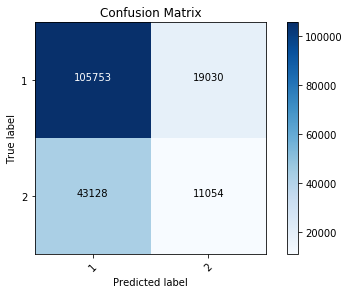

In [251]:
knn_cnf_mx = confusion_matrix(severity_classes, knn_severityprediction_cross, labels=[1,2])
plt.figure()
plot_confusion_matrix(knn_cnf_mx, classes=[1,2], normalize= False,  title='Confusion Matrix')
print(classification_report(severity_classes, knn_severityprediction_cross))

Decision Tree works slightly better with regard of the minority class, but overall KNN has a greater accuracy. Considering KNN greatest accuracy, I decide to pick KNN (K=7) as the algorithm for Model 2 – Classification of Severity Collision.

## 6. Discussion <a name="discussion"></a>

For the first model, we've achieved 90% accuracy, using K-Nearest-Neighbors algorithm (number of neighbors=8).  
It is important to note that Model 1 – Classification of Risk doesn’t predict the likelihood of getting into a car accident, but it returns a binary classification able to predict the class of risk based on the average number of total collision that took place in the considered timeframe (a high risk means that input conditions, historically, are those ones with a number of accidents greater than the mean). This approach might be considered “naif”, however I reckon this kind of model can give a “warning” to a driver who’s planning a car-trip under conditions considered dangerous from an objective point of view (that is conditions under which the majority of accidents happen).

For the second model, we've achieved 65% of accuracy, again using K-Nearest-Neighbors algorithm (number of neighbors=7), therefore there’s still room for improvement.  
Resampling techniques didn’t return any better results; I tried the same algorithms with geo-clusters (instead of latitude and longitude), and even different feature selection (choosing only features with ANOVA F-test scores above a certain threshold), but, again, outputs weren’t any better (or even worse). My conclusion is that the severity of a potential collision is a difficult prediction to make; features such as “vehicles speed”, “total people involved”, "driver under alcohol/drug influence”, might significantly help, but they are not known at the time of attempting a prediction, so they can’t be used; however, “individual/per vehicle” features might also contribute to a collision’s severity, and, therefore, to the model’s performance. For instance, knowing the number of people in each vehicle, during a collision, might be helpful: in this case a potential user knows (or anyway might have an idea of) how many people will be in his/her own vehicle and the feature can be used to attempt a prediction. These types of data are obviously more difficult to obtain, but they could bring significant improvements to the model.

## 7. Conclusion <a name="conclusion"></a>

In this project, I built 2 classification models for potential users to enable them making a more informed decisions about their future travel plans.  
I selected K-Nearest-Neighbors (KNN) as the algorithm for both models. Built classification models predict whether the risk of getting into a car accident is high (that is higher than the mean) or low (Model 1), and whether the severity of a potential collision will be low (only property damaged) or high (people injured/fatality). 

The first model (Class of Risk) is actually made of 2 machine learning models: a clustering-algorithms (K-Means), and a classification one. Users will input the destination location of their trip (amongst other input features), the model will cluster the geo-coordinates, and return the Class of Risk.

For both models I identified location, time and environmental (weather and light conditions) features as the most important features that affect the risk of getting into a car accidents, and its severity. The models can be very useful in warning people about a potential dangerous travel decision.